> ## EDA CASE STUDY - Gramener Loan Risk
>Submitted By       : ***Srinivasan. G, Naveed.J, Denny.J and Kumar.A***<br>
>Date of Submission : ***30-December-2018***<br>
>Batch              : ***September - 2018***<br>

### Business Context
>    The company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.When the company receives a loan application, the company has to make a decision for loan approval or reject the application based on the applicant’s profile.<br><br>
Once the application is accepted and the loan has to be sanctioned. The risk associated with that is either borrower will repay the amount in installments (both principal and interst) completely or can default leading to credit loss for the company.

### Problem Statement
>    Like most other lending companies, lending loans to 'risky' applicants is the largest source for the financial loss or credit loss. If the borrower refuses or fails to repay the loan are considered as 'Charged Off' and the repayment amount is the credit loss to the company.<br>

>    If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.<br>

>   Also, company wants to understand the driving factors (or driver variables) behind loan default. i.e., the variables which strong indicators of default.<br>

### Dataset Information provided
>   The loan dataset contains the complete loan data for all loans issued through the time period 2007 t0 2011. It contains information about customer and loan attributes of the previously approved loan applicants.<br>

### Objective of Case Study
>   The aim is to identify patterns and driving variables which indicate if a loan application is likely to default, which may be used for taking decisions such as deny loans,reducing amount of loan, lending (to risky applicants) at higher interest rate etc.,

### Methodologies & Deliverables
>   Execute EDA on the dataset provided and risk analysis to gain understanding on lending patterns and driving variables.<br>
> 1. Data cleansing on the dataset by removing unknown and unwanted data 
> 2. Perform univariate and bivariate analysis etc., on the variables to identify patterns
> 3. Determine the driving factors (driving variables) which have strong influence lending to 'risky applicants'.
> 4. Present analysis results in graphical representation in python jupyter notebook
> 5. Present finding through visualisations using Tableau and presentation in pdf document.

### Import Libraries for analysis<br>

In [23]:
# Import All necessary Libraries numpy,pandas,matplotlib and seaborn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Setup necessary Jupyter notebook options<br>

In [24]:
# Set up jupyter notebook options to work.
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
# If necessary use the set options of the display . If not required. disable 
pd.set_option('display.max_columns', 70)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.max_rows = 999

In [26]:
#Change the float format for display in notebook
pd.options.display.float_format = '{:,.2f}'.format

## 1. Read the Loan data <br>

In [55]:
## Read the Uber Request Data.csv file 
loan = pd.read_csv("C:/Users/134466/Desktop/EDA-Assignment/loan.csv",low_memory=False) 

## 2. Data Cleansing <br>

### 2.1 Verify the data and attributes<br>

In [56]:
# Verify the shape of the data frame.
loan.shape

(39717, 111)

In [57]:
# check column names, data types and other info.
pd.set_option('max_info_columns', 115)
loan.info()
pd.reset_option('max_info_columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [58]:
# make sure that number of duplicate rows are zero (Key column duplicated or not)
sum(loan.duplicated(subset = "id")) == 0

True

In [59]:
## Verify null null values in the data frame.
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### **Observations**
> 1. As per section 2.1, there are total of `39717 rows and 111 columns` in the data frame.
> 2.  There are many columns where all the rows of the columns are NULL

#### **Inferences & Conclusions**
> 1. Need to remove all the columns which are NULL

### 2.2 Remove Columns for which all rows are NULL <br>

In [60]:
# Following are the list of columns which has all the rows having NULL
null_columns=loan.columns[loan.isnull().all()]
loan[null_columns].isnull().sum().count()

54

In [61]:
# List the null columns where all rows are NULL
loan[null_columns].isnull().sum()

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [62]:
# The columns with all rows having NULL are not useful for our analysis 
# and hence it can be dropped safely.
# There are total of 54 columns with all rows NULL out of 111 columns.

# Drop all columns which have all Null values
loan.dropna(axis=1,how='all',inplace=True)
loan.shape

(39717, 57)

In [63]:
## Verify the NULL percentages attributes in the loan data frame. 
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

#### **Observations**
> 1. As per Section 2.2, there are total of `54 columns out of 111` has all the rows NaN in the data frame.
> 2. There will be 39717 rows and 57 columns remaining in the data frame after clean up.
#### **Conclusions** 
> 1. There are numerous non-essential arrtibutes or columns with predominantly NA or 0 values. The columns which are not useful for EDA required to be removed from the data frame.<br><br>
> 2. Further analysis on each of the remaining columns to understand the key which are the driving factor for our risk analysis.<br><br>

### 2.3 Remove columns which are non-essential for the analysis <br>

In [64]:
# Following columns are non-essential for our analysis  hence they can be removed
# Also, they are text based and not Key driving factors in the analysis.
#
# Loan Title - A title name provided by the borrower
# Loan Desc - A string details the purpose of the loan
# URL - A web address specific to a particular loan application record.

column_list = ['url','desc','title']
loan.drop(columns=column_list,axis=1,inplace=True)

In [65]:
# display records in the data frame loan.
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,38.00,nan,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
5,1075269,1311441,5000,5000,"5,000.00",36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,nan,nan,9,0,7963,28.30%,12,f,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
6,1069639,1304742,7000,7000,"7,000.00",60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,"47,004.00",Not Verified,Dec-11,Fully Paid,n,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,nan,nan,7,0,17726,85.60%,11,f,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,May-16,"1,313.76",NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
7,1072053,1288686,3000,3000,"3,000.00",36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,"48,000.00",Source Verified,Dec-11,Fully Paid,n,car,900xx,CA,5.35,0,Jan-07,2,nan,nan,4,0,8221,87.50%,4,f,0.00,0.00,"3,939.14","3,939.14","3,000.00",939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
8,1071795,1306957,5600,5600,"5,600.00",60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,"40,000.00",Source Verified,Dec-11,Charged Off,n,small_business,958xx,CA,5.55,0,Apr-04,2,nan,nan,11,0,5210,32.60%,13,f,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
9,1071570,1306721,5375,5375,"5,350.00",60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,"15,000.00",Verified,Dec-11,Charged Off,n,other,774xx,TX,18.08,0,Sep-04,0,nan,nan,2,0,9279,36.50%,3,f,0.00,0.00,"1,476.19","1,469.34",673.48,533.42,0.00,269.29,2.52,Nov-12,

In [66]:
# The Columns which are having either 0 or NA as values.
# 1. tax_liens    
# 2. chargeoff_within_12_mths  
# 3. collections_12_mths_ex_med  
# 4. acc_now_delinq  
# 5. delinq_amnt  
#
# So, we can safely drop the above columns.
#
column_list = ['tax_liens',
               'chargeoff_within_12_mths',
               'collections_12_mths_ex_med',
               'acc_now_delinq',
               'delinq_amnt']
loan.drop(columns=column_list,axis=1,inplace=True)

In [67]:
# Also, there are columns (categorical attributes)  contains only one value for all rows. 
# Since thease columns have only one value in all rows and does not yield any valuable insights for our analysis
# hence drop the column from loan data frame.
# They are ;
# 1.  pymnt_plan - contains only 'n'
# 2.  initial_list_status - contains only 'f'
# 3.  policy_code - contains only '1'
# 4.  application_type - contains only 'INDIVIDUAL'

column_list = ['pymnt_plan',
               'initial_list_status',
               'policy_code',
               'application_type']

loan.drop(columns=column_list,axis=1,inplace=True)

In [68]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

#### **Observations**
As per Section 2.3,Following were the observations ;
 > 1. The heavy text based & non-key driving factors makes the below columns attributes non-essential for our analysis and can be removed.The columns are ;
     - ***`Loan Title`*** - A title name provided by the borrower
     - ***`Loan Desc`***  - A string details the purpose of the loan
     - ***`URL`***        - A web address specific to a particular loan application record.<br>
 > - Also the following columns have either 0 or NA. Even if impute all values of 'NA' we still end up with only one value 0, which is anyway not useful for our analysis and yield any valuable  insights and can be removed.
     - ***`tax_liens`*** - determine the number of taxliens (0 or NA)<br>
     - ***`chargeoff_within_12_mths`*** - Number of charge-offs within 12 months(0 or NA)<br>
     - ***`collections_12_mths_ex_med`*** - Number of collections in 12 months excluding medical collections (0 or NA)<br>
     - ***`acc_now_delinq`*** - The number of accounts on which the borrower is now delinquent. (only 0)<br>
     - ***`delinq_amnt`***  - Past-due amount owed for the accounts on which the borrower is now delinquent.(Only 0)<br>
> - There are still 3 columns with high percentage NULL values. Need further analysis either to drop the column or impute values. The columns are ;
  - ***`mths_since_last_delinq`*** - (64.66%)
  - ***`mths_since_last_record`*** - (94.99%
  - ***`next_pymnt_d`*** -           (97.13%)
     
#### **Conclusions**
> 1. The above mentioned five attibutes or columns which predominantly  contains 0 or NA values. These columns should be removed from the data frame.
> 2. The columns which heavey text based such desc,title and URL should be dropped.
> 3. Further analysis, on cleaning up of high percentage null value columns.

### 2.4 Check any duplicate rows exists <br>

In [69]:
# Verify existence of any duplicate rows in the data frame.
print("The number of duplicate rows in loan : ",loan.duplicated().sum())

The number of duplicate rows in loan :  0


### 2.5 Convert columns to standard datetime format <br>

In [70]:
# There are five columns which are not in standard date format
# They are in MMM-YY format and should be converted equivelent datetime formats.
# The five columns are ;
# Issue_d 
# earliest_cr_line 
# last_pymnt_d 
# next_pymnt_d 
# last_credit_pull_d 

loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y',errors='coerce')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y',errors='coerce')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%y',errors='coerce')
loan['next_pymnt_d'] = pd.to_datetime(loan['next_pymnt_d'],format='%b-%y',errors='coerce')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y',errors='coerce')

In [71]:
loan['earliest_cr_line'].dtype
loan['last_pymnt_d'].dtype
loan['next_pymnt_d'].dtype
loan['last_credit_pull_d'].dtype

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

### 2.6 Convert column with % (percentage) to numeric format <br>

In [72]:
# The column int_rate and revol_util are either rate or represented in percentages (%)
# Hence, Remove % and convert the string objects to numeric for our analysis.

loan.int_rate = pd.to_numeric(loan.int_rate.str.replace("%",""),errors="coerce")
loan.revol_util = pd.to_numeric(loan.revol_util.str.replace("%",""),errors="coerce")

In [73]:
loan.int_rate.dtypes
loan.revol_util.dtypes

dtype('float64')

dtype('float64')

### 2.7 Convert int amount column attributes float format <br>

In [74]:
# Convert loan_amnt, funded_amnt to float type.

loan.loan_amnt = loan['loan_amnt'].astype('float64')
loan.funded_amnt = loan['funded_amnt'].astype('float64')
loan.loan_amnt.dtypes
loan.funded_amnt.dtypes

dtype('float64')

dtype('float64')

In [75]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null float64
funded_amnt                39717 non-null float64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
purpose                    39717 non-null obje

### 2.8 Conversion all string attributes to Upper Case  <br>

In [76]:
# Convert all string object columns from lower case to uppercase for consistency.
loan = loan.applymap(lambda s:s.upper() if type(s) == str else s)

### 2.9 Re- Verify the percentage NULL Values in loan data frame <br>

In [77]:
## Reverify the percentage of Null Columns
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

### 2.10 Remove redundant Key column or attribute member_id <br>

In [78]:
# There are two key columns (index) exists in the data which is redundant.
# They are ;
# id - A unique ID for Loan Listing
# member_id - A unique ID to customer
# So we can drop one of the key columns . In this case, The member_id is dropped.
loan.drop(columns=['member_id'],axis=1,inplace=True)

### 2.11 Remove high % NULL value columns <br>

In [79]:
# We have a columns 'mths_since_last_record' and 'next_pymnt_d' having high percentage of NULL Values.  
# mths_since_last_record - 93%
# next_pymnt_d - 100%
# As both the columns having high percentage NULL values it is better to drop rather to impute with some values.

loan.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [80]:
## Reverify the percentage of Null Columns
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                        0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 6.19
emp_length                2.71
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
purpose                   0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_pymnt               0.00
total_pymnt_inv           0.00
total_re

#### **Observations**
> On Further analysis, based on Section 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,2.10 and 2.11;
  1. Possibility of duplicate rows  in loan data frame.<br>
  - Following month and year type columns are string objects and required to convert to datetime format. <br>
    - ***`Issue_d`*** - The Date/month on which the loan was funded.
    - ***`earliest_cr_line`***   - The Date/month the borrower's earliest reported credit line was opened.
    - ***`last_pymnt_d`***       - Last Date/month payment was received.
    - ***`next_pymnt_d`***       - Next scheduled payment date.
    - ***`last_credit_pull_d`*** - The most recent Date/month LC pulled credit for this loan.<br>
  - The rate columns with numeric & '%' symbol to be removed <br>
    - ***`int_rate`***           - Interest Rate on the loan.
    - ***`revol_util`***         - Revolving line utilization rate.
  - The ***`loan_amnt`*** and ***`funded_amnt`*** columns are integers<br>
  -  Inconsistancies in character case in string column attributes.
  -  Redundant Key column attribute member_id.
  -  The following column still high percentage of NULL values and related to the customers who are still paying installments (CURRENT) - Not related to any 'risky applicants' or 'DEFAULT' customers. Since we are more interested in analysing 'DEFAULT' Customers, the below columns can be ignored.
     - ***`mths_since_last_record`*** - 93% 
     - ***`next_pymnt_d`*** - 97%
     
#### **Conclusions**
> - Checked and confirmed that no duplicates exists in loan data frame.
> - Month and Year type string column attributes are verified & converted to Datetime objects.
> - The rate columns with % symbol are removed and converted to numeric format.
> - The `loan_amnt` and `funded_amnt` columns converted to correct float format.
> - Inconsistencies in character columns are removed by converting all columns values to upper case.
> - Removed the redundant member_id column and retain id column as key.
> - Non essential & high null value percentage column attributes `mths_since_last_record` and `next_pymnt_d` are dropped.

### 2.12 Filter rows only having loan applications for loan status as 'Charged Off' or 'Fully Paid'  for further data analysis <br> 

In [81]:
#In this case study, the main aim is to understand how consumer attributes and 
# loan attributes influence the tendency of default.
#
# i.e., the customer who has either the Charged Off or Fully-Paid loan status.
# So, we will filter out the row which has loan_status = 'CURRENT'
# i.e., the customers who are paying their term loan installments.

loan_filtered = loan.loc[loan.loan_status != 'CURRENT',:]
loan_filtered.shape

(38577, 41)

#### **Conclusions**
> - From the business perspective we are interested in understanding customer attributes and loan attributes 
that influence the tendency to default the loan leading to credit loss. In such cases we will be interested 
only in analyzing the loan applications that have either the Charged Off or Fully-Paid loan status. 
> - We cannot anticipate the outcome of loans that are currently in process as they may result in either being     Fully-Paid or Charged-Off resulting in credit loss. Therefore we will remove all records with the loan_status of Current in the dataset and the subset data frame is called `loan_filtered`.

### 2.13 Split filtered loan based on Loan Status <br>

In [224]:
#Since we have completed Dataframe cleaning here 
# we will create two sub dataframes based on the loan status and begin our EDA.
chargedoff_loan = loan_filtered.loc[loan_filtered.loan_status == 'CHARGED OFF',:]
fullypaid_loan =  loan_filtered.loc[loan_filtered.loan_status == 'FULLY PAID', :]

In [83]:
# Verify the shape of the resultant data frames.
chargedoff_loan.shape
fullypaid_loan.shape

(5627, 41)

(32950, 41)

### 2.14 Percentage rows left after Data clean up in Loan  <br>

In [84]:
# Verify the percentage rows left after all cleanup.
#
print("The percentage of row left after cleansing for loan Data Frame : ",\
                  round(100*(len(loan_filtered.index)/39717),2),"%")
loan.shape

The percentage of row left after cleansing for loan Data Frame :  97.13 %


(39717, 41)

In [ ]:
loan.to_csv("Data/loan_clean.csv")

In [86]:
loan.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,"5,000.00","5,000.00","4,975.00",36 MONTHS,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,"24,000.00",VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00
1,1077430,"2,500.00","2,500.00","2,500.00",60 MONTHS,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,"30,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00
2,1077175,"2,400.00","2,400.00","2,400.00",36 MONTHS,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,"12,252.00",NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00
3,1076863,"10,000.00","10,000.00","10,000.00",36 MONTHS,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,"49,200.00",SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00
4,1075358,"3,000.00","3,000.00","3,000.00",60 MONTHS,12.69,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1 YEAR,RENT,"80,000.00",SOURCE VERIFIED,2011-12-01,CURRENT,OTHER,972XX,OR,17.94,0,1996-01-01,0,15,0,27783,53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.00
5,1075269,"5,000.00","5,000.00","5,000.00",36 MONTHS,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,"36,000.00",SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00
6,1069639,"7,000.00","7,000.00","7,000.00",60 MONTHS,15.96,170.08,C,C5,SOUTHERN STAR PHOTOGRAPHY,8 YEARS,RENT,"47,004.00",NOT VERIFIED,2011-12-01,FULLY PAID,DEBT_CONSOLIDATION,280XX,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,2016-05-01,"1,313.76",2016-05-01,0.00
7,1072053,"3,000.00","3,000.00","3,000.00",36 MONTHS,18.64,109.43,E,E1,MKC ACCOUNTING,9 YEARS,RENT,"48,000.00",SOURCE VERIFIED,2011-12-01,FULLY PAID,CAR,900XX,CA,5.35,0,2007-01-01,2,4,0,8221,87.50,4,0.00,0.00,"3,939.14","3,939.14","3,000.00",939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.00
8,1071795,"5,600.00","5,600.00","5,600.00",60 MONTHS,21.28,152.39,F,F2,NaN,4 YEARS,OWN,"40,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,SMALL_BUSINESS,958XX,CA,5.55,0,2004-04-01,2,11,0,5210,32.60,13,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,2012-08-01,0.00
9,1071570,"5,375.00","5,375.00","5,350.00",60 MONTHS,12.69,121.45,B,B5,STARBUCKS,< 1 YEAR,RENT,"15,000.00",VERIFIED,2011-12-01,CHARGED OFF,OTHER,774XX,TX,18.08,0,2004-09-01,0,2,0,9279,36.50,3,0.00,0.00,"1,476.19","1,469.34",673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,2013-03-01,0.00


#### **Observations**
> Based on Section  2.12, 2.13 and 2.14 ;
  - Required only relevent rows for analysis based on loan status. <br>
  - Existence of High perecntage null value non essential columns such as; <br>
    - ***`next_pymnt_d`***           - Next scheduled payment date
    - ***`mths_since_last_record`*** - The number of months since the last public record..
    - ***`mths_since_last_delinq`*** - The number of months since the borrower's last delinquency.
      
#### **Conclusions**
> - Filter loan data frame based on loan status (i.e., all rows which are having loan status either 'Charged Off' or "Fully Paid:.
> - Remove high percentage null value columns as listed above from the filtered data frame.
> - ***`The percentage of rows left after Data cleansing for loan Data Frame : 97.13 %`***
> - Split the filtered data frame further in to two sub data frames as `chargedoff_loan` and `fullypaid_loan` for any specific data analysis.

## 3. Data Analysis

### 3.1 Univariate Analysis <br>

In [37]:
%matplotlib inline
import warnings

sns.set()
sns.set(style="whitegrid",palette='muted',color_codes=True)

In [38]:
loan_filtered.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,"5,000.00","5,000.00","4,975.00",36 MONTHS,10.65,162.87,B,B2,NaN,10+ YEARS,RENT,"24,000.00",VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00
1,1077430,"2,500.00","2,500.00","2,500.00",60 MONTHS,15.27,59.83,C,C4,RYDER,< 1 YEAR,RENT,"30,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00
2,1077175,"2,400.00","2,400.00","2,400.00",36 MONTHS,15.96,84.33,C,C5,NaN,10+ YEARS,RENT,"12,252.00",NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00
3,1076863,"10,000.00","10,000.00","10,000.00",36 MONTHS,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,"49,200.00",SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00
5,1075269,"5,000.00","5,000.00","5,000.00",36 MONTHS,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,"36,000.00",SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00
6,1069639,"7,000.00","7,000.00","7,000.00",60 MONTHS,15.96,170.08,C,C5,SOUTHERN STAR PHOTOGRAPHY,8 YEARS,RENT,"47,004.00",NOT VERIFIED,2011-12-01,FULLY PAID,DEBT_CONSOLIDATION,280XX,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,2016-05-01,"1,313.76",2016-05-01,0.00
7,1072053,"3,000.00","3,000.00","3,000.00",36 MONTHS,18.64,109.43,E,E1,MKC ACCOUNTING,9 YEARS,RENT,"48,000.00",SOURCE VERIFIED,2011-12-01,FULLY PAID,CAR,900XX,CA,5.35,0,2007-01-01,2,4,0,8221,87.50,4,0.00,0.00,"3,939.14","3,939.14","3,000.00",939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.00
8,1071795,"5,600.00","5,600.00","5,600.00",60 MONTHS,21.28,152.39,F,F2,NaN,4 YEARS,OWN,"40,000.00",SOURCE VERIFIED,2011-12-01,CHARGED OFF,SMALL_BUSINESS,958XX,CA,5.55,0,2004-04-01,2,11,0,5210,32.60,13,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,2012-08-01,0.00
9,1071570,"5,375.00","5,375.00","5,350.00",60 MONTHS,12.69,121.45,B,B5,STARBUCKS,< 1 YEAR,RENT,"15,000.00",VERIFIED,2011-12-01,CHARGED OFF,OTHER,774XX,TX,18.08,0,2004-09-01,0,2,0,9279,36.50,3,0.00,0.00,"1,476.19","1,469.34",673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,2013-03-01,0.00
10,1070078,"6,500.00","6,500.00","6,500.00",60 MONTHS,14.65,153.45,C,C3,SOUTHWEST RURAL METRO,5 YEARS,OWN,"72,000.00",NOT VERIFIED,2011-12-01,FULLY PAID,DEBT_CONSOLIDATION,853XX,AZ,16.12,0,1998-01-01,2,14,0,4032,20.60,23,0.00,0.00,"7,678.02","7,678.02","6,500.00","1,178.02",0.00,0.00,0.00,2013-06-01,"1,655.54",2015-12-01,0.00


#### 3.1.1 - Plot-1 - Analyse the Frequency and Percentage Loan Status .

In [87]:
loan_status_percent = loan.groupby('loan_status')['id'].count().reset_index()
loan_status_percent['percent_loan'] = 100 * (loan_status_percent.id /loan_status_percent.id.sum())
loan_status_percent

,loan_status,id,percent_loan
0,CHARGED OFF,5627,14.17
1,CURRENT,1140,2.87
2,FULLY PAID,32950,82.96


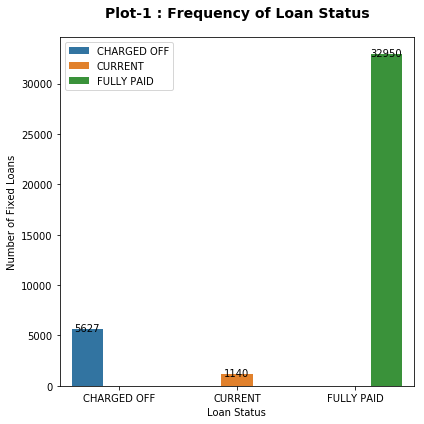

In [88]:
#Univariate Analaysis - Plot-1 
# Loan Status category Counts

# Set up the matplotlib figure
plt.figure(figsize=(6,6))

# Draw bar plot for counts.
ax1 = sns.barplot(data=loan_status_percent,x="loan_status", y="id",hue='loan_status')
                         
# Customize,Title,legends,annotations for subplot -1
ax1.set_title('Plot-1 : Frequency of Loan Status',
               fontdict={'fontsize':14,'fontweight':'bold'},loc='center',
                pad=20) 
ax1.set(ylabel='Number of Fixed Loans', xlabel='Loan Status')
ax1.legend()

#Annotations.
#Annotations.
for p in ax1.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax1.annotate('{:.0f}'.format(height),(width, height+100),
                     ha='center', va='center')

# Draw plots
plt.tight_layout()
plt.show();

In [40]:
# pie charts instead of a count plots
def pie_chart(dataframe,col,Title):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe[col].values
        
    fig1, ax1 = plt.subplots()
    ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show();

In [41]:
#Overall Loan Status Percentage across loan applicants

loan_status = pd.DataFrame(loan.loan_status.value_counts())
loan_status

,loan_status
Fully Paid,32950
Charged Off,5627
Current,1140


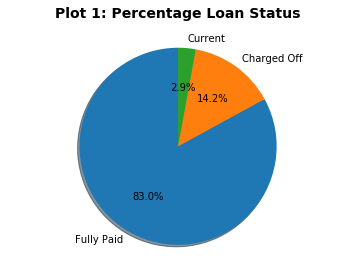

In [89]:
#Univariate Analaysis - Plot-2 
# Loan Status category Counts

pie_chart(loan_status,'loan_status',"Plot 1: Percentage Loan Status")

####  Observations
> - The Plot-1 indicates out of 39717 loans granted to applicants 5627 loans were 'default' (charged off loans) and 1140 loans are 'current' (or payment active loans for which installments are getting paid).
> - The Plot-2 Indicates the highest percentage customers are in 'fully paid' category i.e., who fully repay their loan (the principla and interest rate) - `83.%` 
> - Approximately `14.2%` of customers fall in the category of 'Charged Off' i.e., they don't pay their due in time or for a long period of time (defaulted).

#### 3.1.2 - Plot-2 - Analyse the Loan Term agsinst Default Loan Applications (Charged Off Loans)

In [90]:
#Analysis of Loan Term versus Count of Charged-Off Loans

default_term = pd.DataFrame(chargedoff_loan.term.value_counts())
default_term

,term
36 MONTHS,3227
60 MONTHS,2400


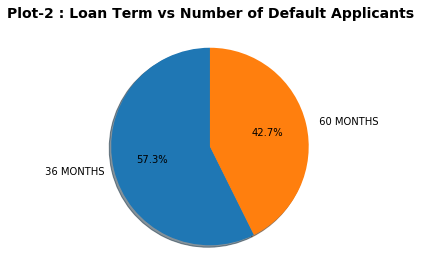

In [91]:
# Univariate Analysis - Plot-3
# Loan Term vs Charged Off Loan Counts.

pie_chart(default_term,'term',"Plot-2 : Loan Term vs Number of Default Applicants")

####  Observations
> - The Plot-2 shows percentage default applicants are in category of payment terms in 36 months or 60 months. 
> - The percentage of 36 months category(`57.3%`) is higher than 60 months (`42.7%`) category.

#### 3.1.2 - Plot-3 - Analyse the LC- Assigned Grades versus Number of Default Applicants (Charged off Loans).

In [93]:
#Analysis of LC Assigned grade versus Count of Charged-Off Loans

default_grade = chargedoff_loan.grade.value_counts().reset_index()
default_grade

,index,grade
0,B,1425
1,C,1347
2,D,1118
3,E,715
4,A,602
5,F,319
6,G,101


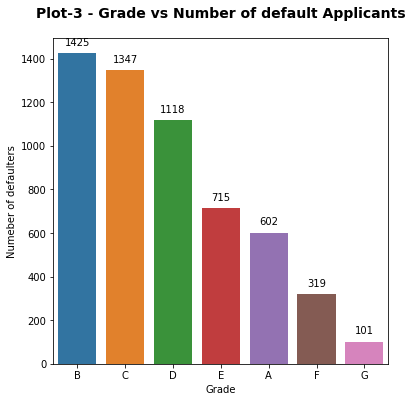

In [94]:
# Univariate Analysis - Plot-4   
# LC Assigned grade versus Count of Charged-Off Loans

f, ax = plt.subplots(figsize=(6, 6))
ax = sns.barplot(x='index',y='grade',data=default_grade)
Title='Plot-3 - Grade vs Number of default Applicants'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Grade")
ax.set_ylabel("Numeber of defaulters")

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+50),
                     ha='center', va='center')
        
plt.show();

####  Observations
> - The Plot-3 shows the highest number 'default' (charged off) customers whose loans are under LC assigned grade 'B' (1425 defaulters) and followed by 'C' (1347 defaulters).

#### 3.1.3 - Plot-4 - Analyse the LC- Assigned sub Grades versus Number of Default Applicants (Charged off Loans).

In [95]:
#Analysis of LC Assigned sub-grade versus Number of default customer loans
default_subgrade = chargedoff_loan.sub_grade.value_counts().reset_index()
default_subgrade

,index,sub_grade
0,B5,356
1,B3,341
2,C1,336
3,B4,329
4,C2,321
5,D2,271
6,C3,270
7,D3,256
8,B2,228
9,A5,217


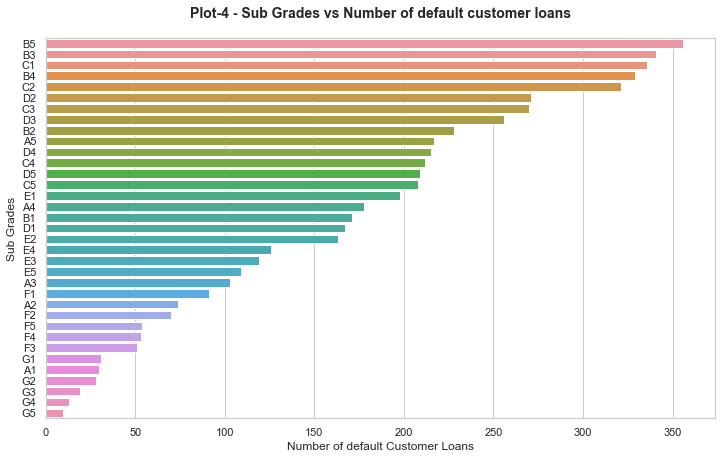

In [49]:
# Univariate Analysis - Plot-5 
# LC Assigned Sub grades versus Count of Charged-Off Loans

f, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(x='sub_grade',y='index',orient='h',data=default_subgrade)
Title='Plot-4 - Sub Grades vs Number of default customer loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Number of default Customer Loans")
ax.set_ylabel("Sub Grades")
       
plt.show();

####  Observations
> - The Plot-4 shows the highest number 'default' (charged off) customers whose loans are under LC assigned sub grade 'B5' (356) and followed by 'B3' (341).

#### 3.1.5 - Plot-5 - Analyse the Employee Experience versus Number of Default Applicants (Charged off Loans).

In [96]:
default_emp_length =  chargedoff_loan.emp_length.value_counts().reset_index()
default_emp_length

,index,emp_length
0,10+ YEARS,1331
1,< 1 YEAR,639
2,2 YEARS,567
3,3 YEARS,555
4,4 YEARS,462
5,5 YEARS,458
6,1 YEAR,456
7,6 YEARS,307
8,7 YEARS,263
9,8 YEARS,203


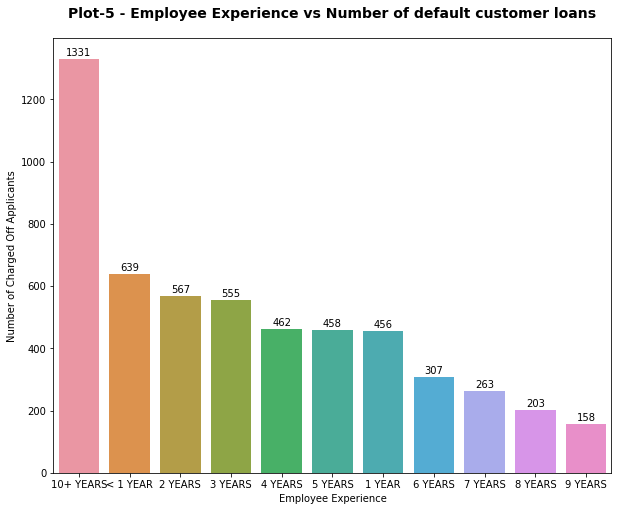

In [97]:
# Univariate Analysis - Plot-6 
# Analysis of Employment Experience versus Number of default loanss

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x='index',y='emp_length',data=default_emp_length)
Title='Plot-5 - Employee Experience vs Number of default customer loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Employee Experience")
ax.set_ylabel("Number of Charged Off Applicants")
#Annotations.
for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+20),
                     ha='center', va='center')
        
plt.show();

####  Observations
> - The Plot-5 indicate employees with experience in the range greater than 10+ years (1331) follwed by less than 1 years (639) are highest number of defaulters.

#### 3.1.6 - Plot-6 - Analyse the Home Ownership versus Number of Default Applicants (Charged off Loans).

In [98]:
#Analysis of Customer Home ownership versus Number of default loans
default_home_ownership = chargedoff_loan.home_ownership.value_counts().reset_index()
default_home_ownership['percentage'] = 100 * (default_home_ownership.home_ownership/
                                              default_home_ownership.home_ownership.sum())
default_home_ownership

,index,home_ownership,percentage
0,RENT,2839,50.45
1,MORTGAGE,2327,41.35
2,OWN,443,7.87
3,OTHER,18,0.32


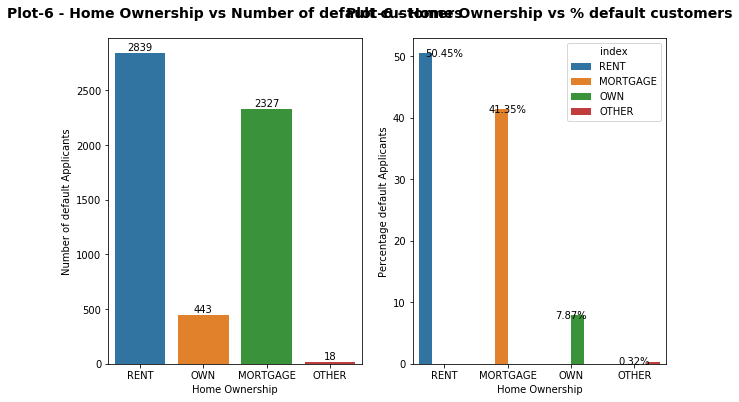

In [99]:
# Univariate Analysis - Plot-7 
# Analysis of Customer Home ownersip versus default Loan Status.

f, axarr = plt.subplots(1,2,figsize=(10,6))
ax1 = sns.countplot(x="home_ownership",\
                      data = chargedoff_loan,ax=axarr[0])
Title='Plot-6 - Home Ownership vs Number of default customers'
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_xlabel("Home Ownership")
ax1.set_ylabel("Number of default Applicants")

#Annotations.
for p in ax1.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax1.annotate('{:.0f}'.format(height),(width, height+50),
                     ha='center', va='center')
        
# Percentage wise Home ownership against Default Loan Status.
# Plot-3 - Univariate Analysis - Loan Term vs Charged Off Loan Counts.

ax2 = sns.barplot(x='index',y='percentage',hue='index',\
                   data=default_home_ownership,ax=axarr[1])
Title='Plot-6 - Home Ownership vs % default customers'
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax2.set_xlabel("Home Ownership")
ax2.set_ylabel("Percentage default Applicants")

#Annotations.
for index,row in default_home_ownership.iterrows():
    ax2.text(x=row.name,y=row.percentage,s='{:}%'.format(round(row.percentage,2)),\
                                       color='black',ha='center',va='center')
    
plt.show();    

####  Observations
> - The Plot-6 indicate employees who are staying in RENT are the highest defaulters with high as 50% i.e., 2839 defaulters. out of 5627 applicants.
> - So, it is clear that most defaulters have rented (50.45%) or mortaged (41.35%) homes.

#### 3.1.7 - Plot-7 - Analyse the Verification Status versus Number of Default Applicants (Charged off Loans).

In [54]:
chargedoff_loan.verification_status.value_counts()

NOT VERIFIED       2142
VERIFIED           2051
SOURCE VERIFIED    1434
Name: verification_status, dtype: int64

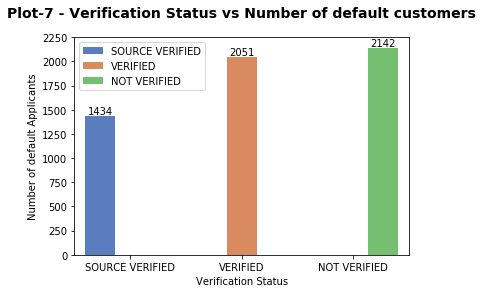

In [100]:
# Univariate Analysis - Plot - 7
#Analysis of Verification Status vs Count of Charged-Off Loans.

ax =sns.countplot(x="verification_status",hue = 'verification_status',\
                                     data = chargedoff_loan,palette='muted')
Title='Plot-7 - Verification Status vs Number of default customers'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Verification Status")
ax.set_ylabel("Number of default Applicants")
ax.legend(loc=2)

#Annotations.
#Annotations.
for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+50),
                     ha='center', va='center')
        
plt.show();

####  Observations
> - The Plot-7 shows employee verification status against the default loan Applicants. 
> - It is very important to note, many applicants status are not verified by the bank, before lending to the 'high risky applicants'.<br>
> - The number of not verified cases are `2142`.

#### 3.1.8 - Plot-8 - Analyse Purpose versus Number of Default Applicants

In [101]:
chargedoff_loan.purpose.value_counts()

DEBT_CONSOLIDATION    2767
OTHER                  633
CREDIT_CARD            542
SMALL_BUSINESS         475
HOME_IMPROVEMENT       347
MAJOR_PURCHASE         222
CAR                    160
MEDICAL                106
WEDDING                 96
MOVING                  92
HOUSE                   59
EDUCATIONAL             56
VACATION                53
RENEWABLE_ENERGY        19
Name: purpose, dtype: int64

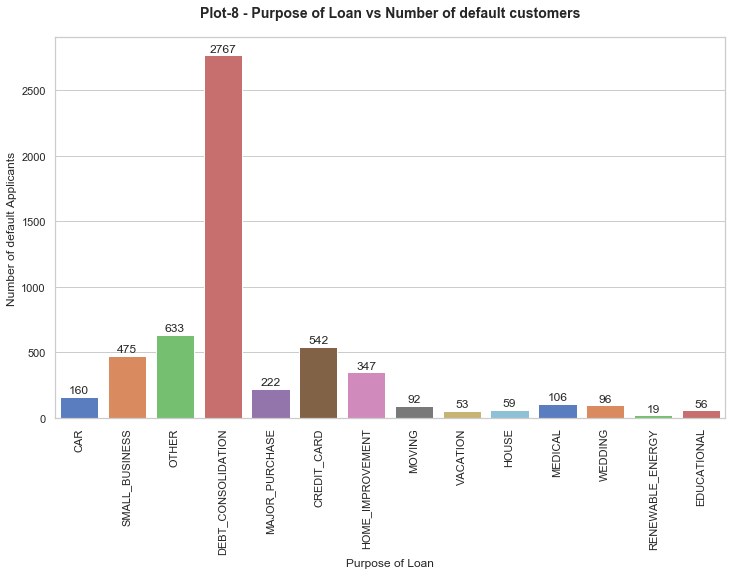

In [57]:
# Univariate Analysis - Plot -8
# Analysis of Loan_Purpose Vs. Count of Charged-Off Loans.

f, ax = plt.subplots(figsize=(12, 7))
ax =sns.countplot(x="purpose",data = chargedoff_loan,palette='muted')
Title='Plot-8 - Purpose of Loan vs Number of default customers'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Purpose of Loan")
ax.set_ylabel("Number of default Applicants")
#ax.legend(loc='center right', bbox_to_anchor=(1.46, 0.92), ncol=1)

for item in ax.get_xticklabels():
    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+50),
                     ha='center', va='center')
        
plt.show();

####  Observations
> - The Plot-8 is for Purpose of the loan against the number of default applicants.
> - It is clear, the highest number of defaulted application are against the debt_consolidation purpose - `2767`.

#### 3.1.9 - Plot-9 - Analyse Resident State against Number of Default Applicants

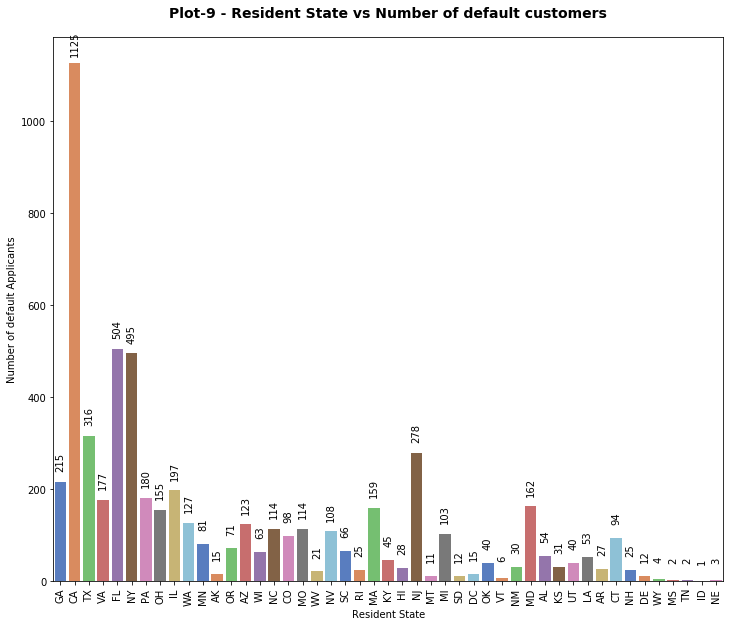

In [103]:
# Univariate Analaysis - Plot-9
# Analysis of Applicant Residence State Vs Count of Charged-Off Loans
f, ax = plt.subplots(figsize=(12, 10))
ax =sns.countplot(x="addr_state",data = chargedoff_loan,palette='muted')
Title='Plot-9 - Resident State vs Number of default customers'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Resident State")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:.0f}".format(height), 
                            (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center', va='center', rotation=90, 
                            xytext=(0, 20), textcoords='offset points') 
               
plt.show();

####  Observations
> - The Plot-9 is shows the number of charged off customer in each of the resident state.
> - It is clear, CA (California) State has most number of cases -`1125`, which are marked charged off.

#### 3.1.10 - Plot-10 - Analyse Resident State against Segmented Loan Status (Charged off and Fully Paid)

In [105]:
# Univariate Analaysis - Plot-10
# Analysis of Applicant Residence State Vs Count of Charged-Off and fully paid Loans
df_addr_state = loan_filtered.groupby(['loan_status','addr_state'])['id']\
                    .count().unstack('loan_status')

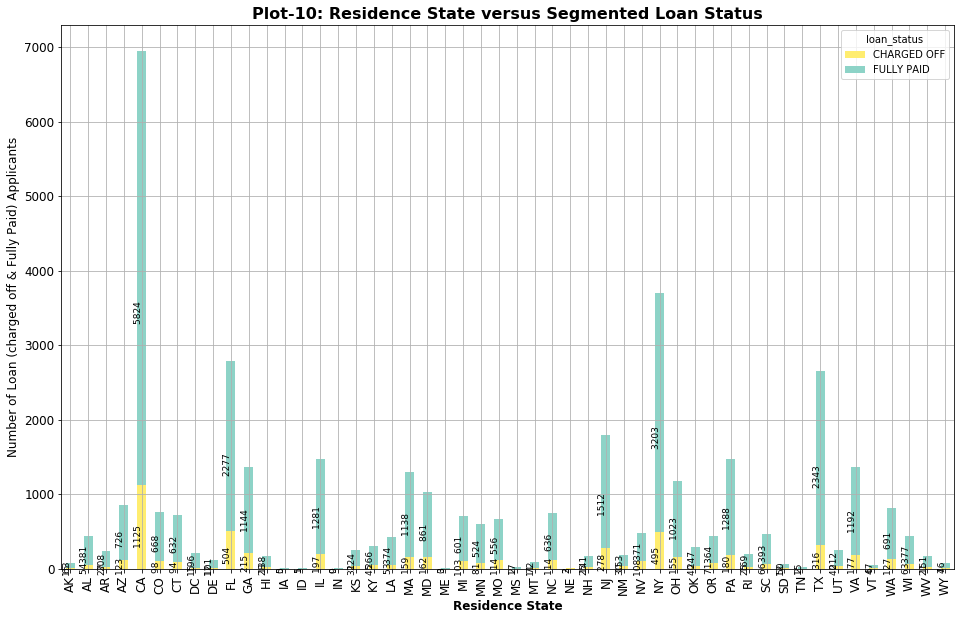

In [106]:
# Draw Matplot lib stacked bar.
ax = df_addr_state.plot(kind='bar',
             stacked=True,
             grid=True,
             figsize=(16,10),
             colormap=plt.cm.Set3_r,
             #colormap='GnBu',
             fontsize=12)

# Set the Title for the plot.

titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-10: Residence State versus Segmented Loan Status",
                   fontdict=titlefonts)

# Set the labels to the stacked bars.

fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_ylabel("Number of Loan (charged off & Fully Paid) Applicants",fontsize=12)
ax.set_xlabel("Residence State",fontdict=fonts)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))


# Annotate the stacked bar plot

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    label = ax.annotate('{:.0f} '.format(height), 
                (p.get_x()+.15*width, 
                 p.get_y()+.4*height),
                 rotation=90,ha='center',va='center',)
    label.set_fontsize(9)

# Display the Stacked Bar Plot.
plt.show();

####  Observations
> - The Plot-10 is shows the number of charged off and Fully Paid customers in each of the resident state.
> - It is clear, CA (California) State has most number of cases -`1125`, of either fully paid or charged off loans
> - The percentage of charged off loan of the total is `18.01%`

### 3.2 Univariate Analysis - Distribution of Continuous Numeric Variables <br>

#### 3.2.1 - Plot-11 - Loan Amount Analysis

In [107]:
# Continuous Numerical Variable -  Loan Amount 
# percentile list 
perc =[.20,.25, .40, .60, .75,.80,.90,.95] 
loan_filtered.loan_amnt.describe(percentiles=perc)

count   38,577.00
mean    11,047.03
std      7,348.44
min        500.00
20%      5,000.00
25%      5,300.00
40%      7,750.00
50%      9,600.00
60%     11,200.00
75%     15,000.00
80%     16,000.00
90%     21,600.00
95%     25,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

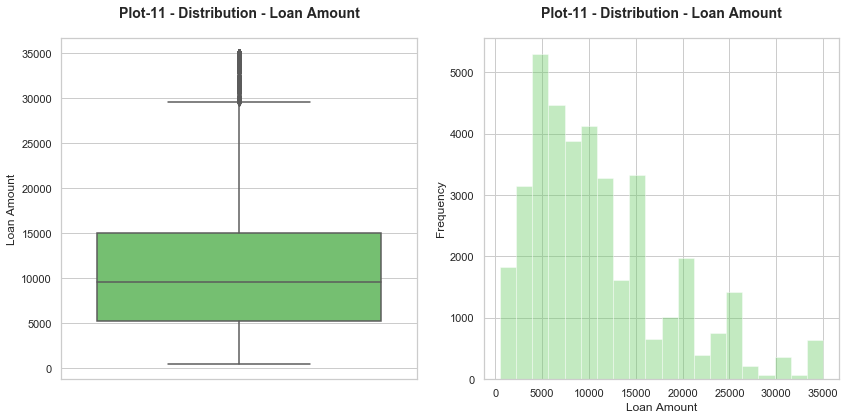

In [62]:
###### Univariate Analysis - Plot - 10
# Continuous Numerical Variable -  loan Amount distribution
f, axn = plt.subplots(1,2,figsize=(12,6))

# Boxplot 

ax1 = sns.boxplot(y=loan_filtered.loan_amnt,color='g',ax=axn[0])
Title='Plot-11 - Distribution - Loan Amount'
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Loan Amount")


# Histogram 
# Ignoring the outliers - that is above 95% for the bins
ax2 = sns.distplot(loan_filtered.loan_amnt,bins=20,
                   rug=False,
                   kde=False,
                   color='g',
                   ax=axn[1])

ax2.set_xlabel("Loan Amount")
ax2.set_ylabel("Frequency")
Title='Plot-11 - Distribution - Loan Amount'
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

####  Observations
> - The Plot-11 shows distribution of loan amount applicants. It is gaussian distribution but there are outliers at the end.
> - The mean of `$11,047.03` and 25% and 75% quartiles of  `$5,300` and `$15,000` respectively.

#### 3.2.2 - Plot-12 - Funded Amount Analysis

In [108]:
# Continuous Numerical Variable -  Loan Amount distribution

# percentile list 
perc =[.20,.25, .40, .60,.75, .80,.90,.95] 
loan_filtered.funded_amnt.describe(percentiles=perc)

count   38,577.00
mean    10,784.06
std      7,090.31
min        500.00
20%      5,000.00
25%      5,200.00
40%      7,500.00
50%      9,550.00
60%     10,875.00
75%     15,000.00
80%     16,000.00
90%     20,000.00
95%     25,000.00
max     35,000.00
Name: funded_amnt, dtype: float64

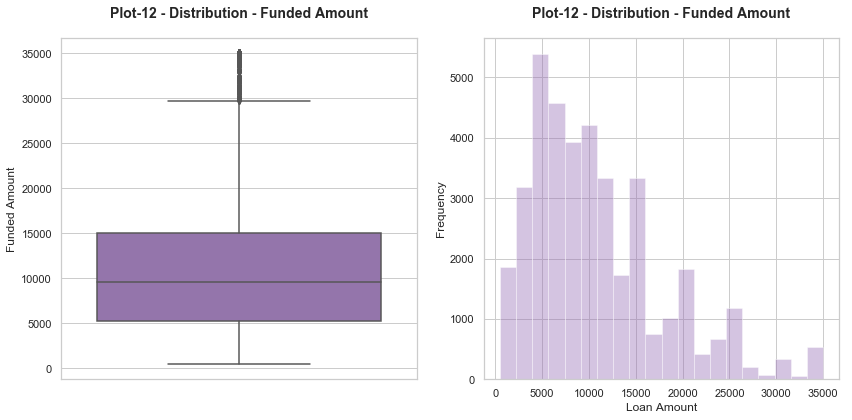

In [64]:
###### Univariate Analysis - Plot - 12

# Continuous Numerical Variable -  Funded Amount distribution
f, axn = plt.subplots(1,2,figsize=(12,6))
Title='Plot-12 - Distribution - Funded Amount'

# Boxplot 
ax1 = sns.boxplot(y=loan_filtered.funded_amnt,ax=axn[0],color='m')
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Funded Amount")

# Histogram 
ax2 = sns.distplot(loan_filtered.funded_amnt,bins=20,
                   rug=False,
                   kde=False,
                   color='m',
                   ax=axn[1])

ax2.set_xlabel("Loan Amount")
ax2.set_ylabel("Frequency")
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
plt.tight_layout()
plt.show();

####  Observations
> - The Plot-12 shows distribution of funded amount across loan applicants. It has almost normal distribution with mean of `$10,784.06` and 25% and 75% quartiles of  `$5,200.00` and `$15,000.00` respectively.

#### 3.2.3 - Plot-13 - Funded Amount Invested Analysis

In [109]:
# Continuous Numerical Variable -  Funded Amount Investment Analysis

# percentile list 
perc =[.20, .25, .40, .60,.75, .80,.90,.95] 
loan_filtered.funded_amnt_inv.describe(percentiles=perc)

count   38,577.00
mean    10,222.48
std      7,022.72
min          0.00
20%      4,375.00
25%      5,000.00
40%      7,000.00
50%      8,733.44
60%     10,000.00
75%     14,000.00
80%     15,000.00
90%     19,975.00
95%     24,500.07
max     35,000.00
Name: funded_amnt_inv, dtype: float64

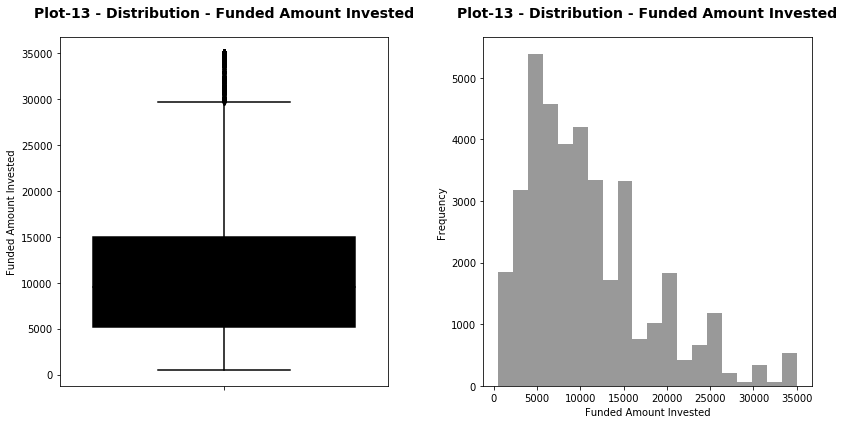

In [110]:
###### Univariate Analysis - Plot - 13
# Continuous Numerical Variable -  Funded Amount Invested distribution
f, axn = plt.subplots(1,2,figsize=(12,6))
Title='Plot-13 - Distribution - Funded Amount Invested'

# Boxplot 
ax1 = sns.boxplot(y=loan_filtered.funded_amnt,ax=axn[0],color='k')
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Funded Amount Invested")

# Histogram 
ax2 = sns.distplot(loan_filtered.funded_amnt,bins=20,
                   rug=False,
                   kde=False,
                   color='k',
                   ax=axn[1])

ax2.set_xlabel("Funded Amount Invested")
ax2.set_ylabel("Frequency")
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
plt.tight_layout()
plt.show();

####  Observations
> - The Plot-13 shows distribution of funded amount Invested across loans. It has almost normal distribution with mean of `$10,222.48`.
> - Fund invested are higher in the range of `$5000 - $10000` range.

#### 3.2.3 - Plot-14 - Interest Rate Analysis

In [111]:
# Continuous Numerical Variable -  Interest Rate Distributions

# percentile list 
perc =[.20, .40, .60, .80,.90,.95] 
loan_filtered.int_rate.describe(percentiles=perc)

count   38,577.00
mean        11.93
std          3.69
min          5.42
20%          7.90
40%         10.99
50%         11.71
60%         12.84
80%         15.21
90%         16.82
95%         18.31
max         24.40
Name: int_rate, dtype: float64

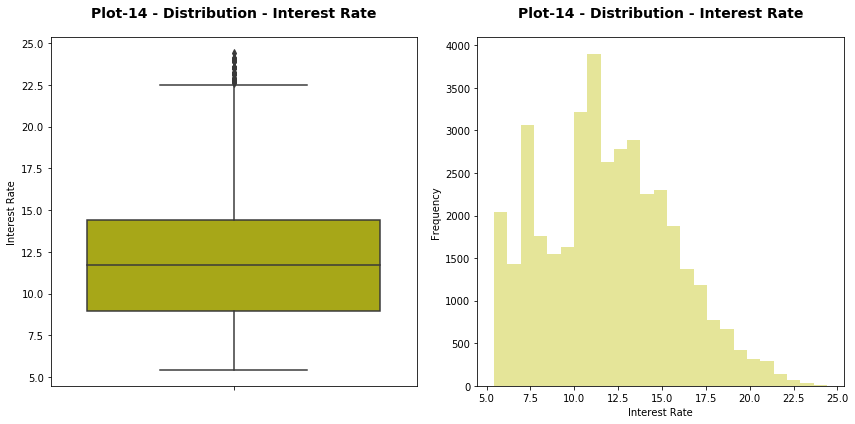

In [112]:
###### Univariate Analysis - Plot - 14
# Continuous Numerical Variable -  Interest Rate

f, axn = plt.subplots(1,2,figsize=(12,6))
Title='Plot-14 - Distribution - Interest Rate'

# Boxplot
ax1 = sns.boxplot(y=loan_filtered.int_rate,ax=axn[0],color='y')
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Interest Rate")

# Histogram 
ax2 = sns.distplot(loan_filtered.int_rate,bins=25,
                   rug=False,
                   kde=False,
                   color='y',
                   ax=axn[1])


ax2.set_xlabel("Interest Rate")
ax2.set_ylabel("Frequency")
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

####  Observations
> - The Plot-14  - From the boxplot & histogram the distribution, we can see that the number of loans for  interest rate spikes between 7-8% and again between 11-13%.

#### 3.2.3 - Plot-15 - Loan Installment Analysis

In [113]:
# Continuous Numerical Variable -  Plot-14 - Loan Installment distribution

# percentile list 
perc =[.20, .25,.40, .60,.75, .80,.90,.95] 
loan_filtered.installment.describe(percentiles=perc)

count   38,577.00
mean       322.47
std        208.64
min         15.69
20%        149.92
25%        165.74
40%        228.71
50%        277.86
60%        327.96
75%        425.55
80%        480.33
90%        620.90
95%        760.82
max      1,305.19
Name: installment, dtype: float64

In [114]:
# We can see the 95% is 763 but the max value is 1305.19 and so we can eliminate 
# those outlier for the bins.
loan_inst_subset = loan_filtered.loc[loan_filtered.installment <=800,:]
perc =[.20, .40, .60, .80,.70,.90,.95] 
loan_inst_subset.installment.describe(percentiles=perc)

count   37,006.00
mean       297.73
std        172.69
min         15.69
20%        144.77
40%        220.74
50%        267.62
60%        317.08
70%        368.45
80%        445.98
90%        547.73
95%        648.75
max        799.84
Name: installment, dtype: float64

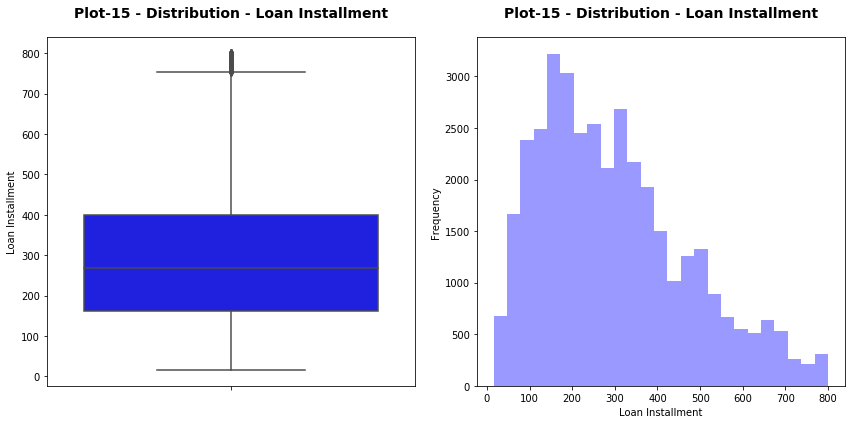

In [115]:
###### Univariate Analysis - Plot - 15
# Continuous Numerical Variable -  Loan Installment Analysis

f, axn = plt.subplots(1,2,figsize=(12,6))
Title='Plot-15 - Distribution - Loan Installment'

# Boxplot
ax1 = sns.boxplot(y=loan_inst_subset.installment,ax=axn[0],color='b')
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Loan Installment")



# Histogram 

ax2 = sns.distplot(loan_inst_subset.installment,bins=25,
                   rug=False,
                   kde=False,
                   color='b',
                   ax=axn[1])


ax2.set_xlabel("Loan Installment")
ax2.set_ylabel("Frequency")
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

####  Observations
> - The Plot-15  - From the boxplot & histogram the distribution, there are significant outliers on the higher side of monthly loan installments. 
> - Using the 95% rule we eliminate the outliers and set the upper bound to `$800`. 
> - In the histogram, we see `70%` all monthly installments are below `$400`.

#### 3.2.4 - Plot-16 - Annual Income Analysis

In [116]:
# Continuous Numerical Variable -  Plot-16 - Loan Annual Income Distribution
# percentile list 
perc =[.20,.25, .40, .60,.70,.75,.80,.90,.95] 
loan_filtered.annual_inc.describe(percentiles=perc)

count      38,577.00
mean       68,777.97
std        64,218.68
min         4,000.00
20%        37,196.16
25%        40,000.00
40%        50,004.00
50%        58,868.00
60%        65,004.00
70%        75,000.00
75%        82,000.00
80%        90,000.00
90%       115,000.00
95%       140,004.00
max     6,000,000.00
Name: annual_inc, dtype: float64

In [117]:
# We can see the 95% is 1,42,000 but the max value is 6,000,000.00 and so we can eliminate 
# those outlier for the bins.
loan_annual_inc = loan_filtered.loc[loan_filtered.annual_inc <=142000,:]
perc =[.20, .40, .60, .80,.70,.90,.95] 
loan_annual_inc.annual_inc.describe(percentiles=perc)

count    36,689.00
mean     60,932.57
std      27,848.22
min       4,000.00
20%      36,000.00
40%      50,000.00
50%      56,000.00
60%      63,600.00
70%      72,000.00
80%      84,000.00
90%     100,000.00
95%     118,000.00
max     142,000.00
Name: annual_inc, dtype: float64

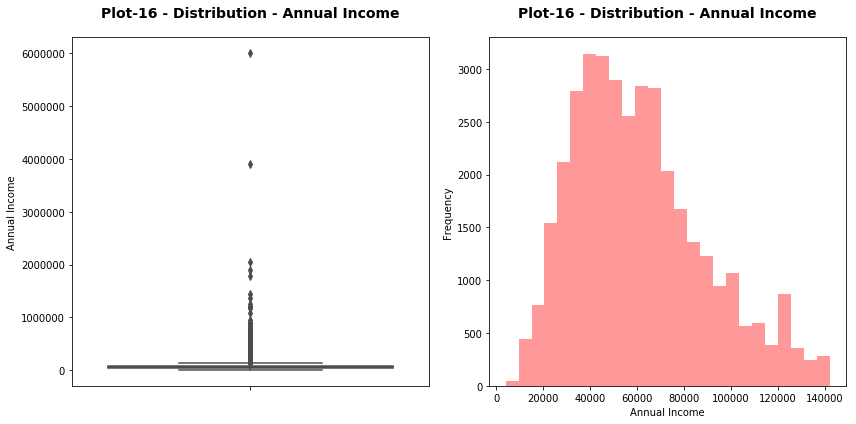

In [118]:
###### Univariate Analysis - Plot - 16
# Continuous Numerical Variable -  Annual Income Analysis

f, axn = plt.subplots(1,2,figsize=(12,6))
Title='Plot-16 - Distribution - Annual Income'

# Boxplot
ax1 = sns.boxplot(y=loan.annual_inc,ax=axn[0],color='r')
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Annual Income")

# Histogram 
ax2 = sns.distplot(loan_annual_inc.annual_inc,bins=25,
                   rug=False,
                   kde=False,
                   color='r',
                   ax=axn[1])


ax2.set_xlabel("Annual Income")
ax2.set_ylabel("Frequency")
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

#####  Observations
> - The Plot-16  - From the boxplot, in the distribution, there are significant outliers on the higher side of annual income of customers. 
> - Using 95% rule, the outliers are eliminated and set the upper limit to `$1,42,000`.
> - In the binned histogram, we see majority are between `$40,000` and `$80,000` annual income category.

#### 3.2.5 - Plot-17 - Debt To Interest Ratio Analysis

In [119]:
# Continuous Numerical Variable - Plot-16 - Debt To Interest Ratio.

# percentile list 
perc =[.20, .40, .60,.70,.80,.90,.95] 
loan_filtered.dti.describe(percentiles=perc)

count   38,577.00
mean        13.27
std          6.67
min          0.00
20%          6.91
40%         11.35
50%         13.37
60%         15.31
70%         17.43
80%         19.71
90%         22.29
95%         23.80
max         29.99
Name: dti, dtype: float64

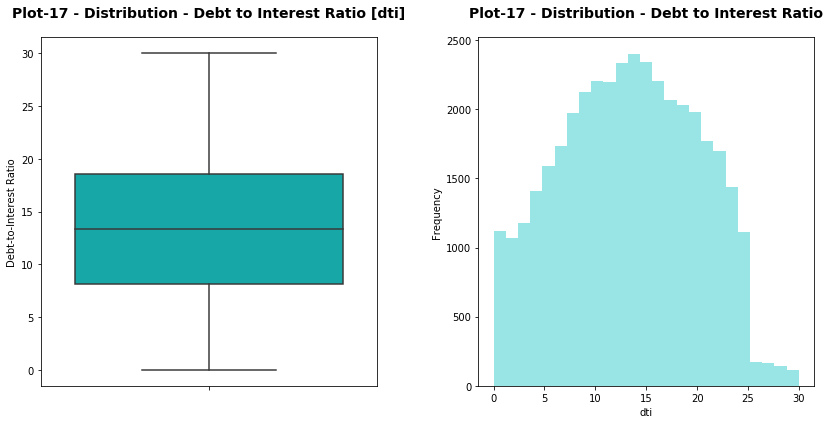

In [120]:
###### Univariate Analysis - Plot -  17
# Continuous Numerical Variable -  DTI analysis
# dti - ratio of borrower’s total monthly debt payments on the total debt obligations

f, axn = plt.subplots(1,2,figsize=(12,6))
Title='Plot-17 - Distribution - Debt to Interest Ratio [dti]'

# Boxplot
ax1 = sns.boxplot(y=loan_filtered.dti,ax=axn[0],color='c')
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Debt-to-Interest Ratio")

# Histogram 
ax2 = sns.distplot(loan_filtered.dti,bins=25,
                   rug=False,
                   kde=False,
                   color='c',
                   ax=axn[1])


ax2.set_xlabel("dti")
ax2.set_ylabel("Frequency")
Title='Plot-17 - Distribution - Debt to Interest Ratio'
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

#####  Observations
> - The Plot-16  - From the boxplot and the histogram, the distribution is normally distributed and the majority in the range of `13%-15%` dti ratio.

#### 3.2.6 - Plot-18 - Loan Issue Date (Year) Analysis

In [121]:
loan_issue_year = pd.DataFrame(loan_filtered.issue_d.dt.year)

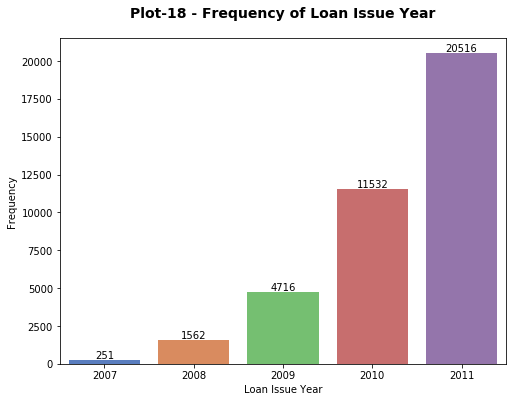

In [122]:
# Univariate Analaysis - Plot-17
###### Univariate Analysis - Plot - 14
# Continuous Numerical Variable -  Issue Date
# Issue_d - The month and year which the loan was funded

f, ax = plt.subplots(figsize=(8,6))
ax =sns.countplot(x="issue_d",data = loan_issue_year,palette='muted')
Title='Plot-18 - Frequency of Loan Issue Year'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Loan Issue Year")
ax.set_ylabel("Frequency")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:.0f}".format(height), 
                            (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center', va='center', 
                            xytext=(0, 5), textcoords='offset points') 
               
plt.show();

#####  Observations
> - The Plot-18  - Shows the majority of the loans were issued during year 2011.
> - The number of loans issued during 2011 is `20516`

#### 3.2.6 - Plot-19 - LC pulled credit year for the loan Analysis

In [123]:
# Filter out the loan_credit_pull_year from loan.last_credit_pull_d
loan_credit_pull_year = pd.DataFrame(loan_filtered.last_credit_pull_d.dt.year)
loan_credit_pull_year = loan_credit_pull_year.last_credit_pull_d.fillna(0).astype(int).reset_index()

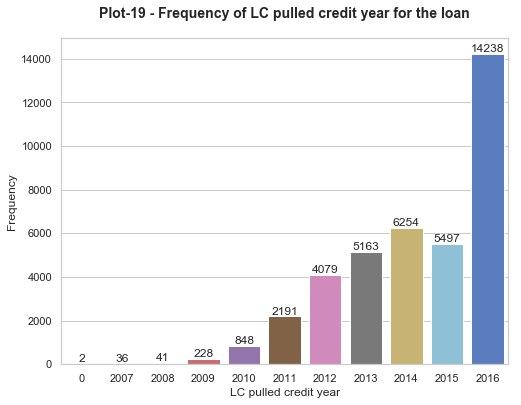

In [80]:
# Univariate Analaysis - Plot-19
###### Univariate Analysis - Plot - 19
# Continuous Numerical Variable -  last_credit_pull_d
# last_credit_pull_d - The most recent month LC pulled credit for this loan

f, ax = plt.subplots(figsize=(8,6))
ax =sns.countplot(x="last_credit_pull_d",data = loan_credit_pull_year,palette='muted')
Title='Plot-19 - Frequency of LC pulled credit year for the loan'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("LC pulled credit year")
ax.set_ylabel("Frequency")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:d}".format(height), 
                            (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center', va='center', 
                            xytext=(0, 5), textcoords='offset points') 
               
plt.show();

#####  Observations
> - The Plot-19  - Shows the majority of the loans were pulled credit for the loans in the year 2011.
> - The number of pulled credit for the loans during 2011 is `14328`

#### 3.2.7 - Plot-20 - Last Credit Payment Year Analysis for the loan Analysis

In [124]:
# Filter out years for last_pymnt_d 
last_credit_pymnt_year = pd.DataFrame(loan_filtered.last_pymnt_d.dt.year)
last_credit_pymnt_year = last_credit_pymnt_year.last_pymnt_d.fillna(0).astype(int).reset_index()

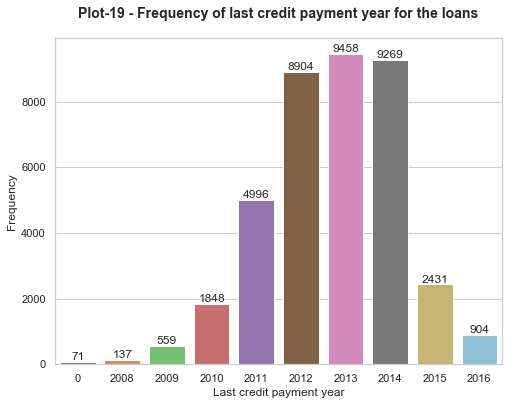

In [82]:
# Univariate Analaysis - Plot-20
###### Univariate Analysis - Plot - 20
# Continuous Numerical Variable -  last_pymnt_d 
# last_pymnt_d  - Last month payment was received

f, ax = plt.subplots(figsize=(8,6))
ax =sns.countplot(x="last_pymnt_d",data = last_credit_pymnt_year,palette='muted')
Title='Plot-19 - Frequency of last credit payment year for the loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Last credit payment year")
ax.set_ylabel("Frequency")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:d}".format(height), 
                            (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center', va='center', 
                            xytext=(0, 5), textcoords='offset points') 
               
plt.show();

#####  Observations
> - The Plot-20  - Shows the highest number credit payment happend for the loans during the year 2013.
> - The number of credit payments for the loans during 2013 is `9458`

#### 3.2.5 - Plot-21 - Total Credit Revolving Balance Analysis

In [125]:
# Continuous Numerical Variable - Plot-16 - revol_bal - Total Credit Revolving Balance.

# percentile list 
perc =[.20, .40, .60,.70,.80,.90,.95,.98] 
loan_filtered.revol_bal.describe(percentiles=perc)

count    38,577.00
mean     13,289.49
std      15,866.49
min           0.00
20%       2,787.00
40%       6,528.00
50%       8,762.00
60%      11,391.60
70%      14,729.40
80%      19,617.00
90%      28,972.00
95%      41,356.20
98%      63,449.00
max     149,588.00
Name: revol_bal, dtype: float64

In [130]:
# We can see the 98% is 63,449 but the max value is 149,588.00 and so we can eliminate 
# those outlier for the bins considering 98% percentile.

total_credit_revol_bal = loan_filtered.loc[loan_filtered.revol_bal <=60000,:]
perc =[.20, .40, .60, .80,.70,.90,.95] 
total_credit_revol_bal.revol_bal.describe(percentiles=perc)

count   37,702.00
mean    11,602.94
std     10,989.79
min          0.00
20%      2,707.00
40%      6,335.40
50%      8,500.00
60%     11,001.60
70%     14,131.40
80%     18,547.60
90%     26,479.00
95%     34,679.00
max     59,980.00
Name: revol_bal, dtype: float64

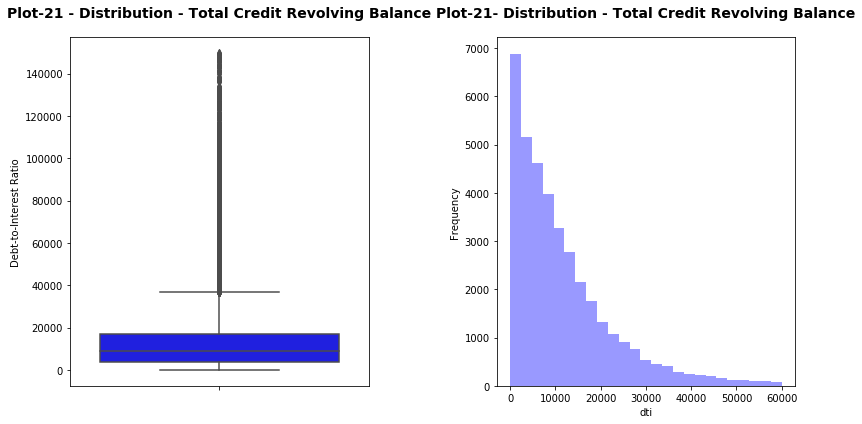

In [128]:
###### Univariate Analysis - Plot -  21
# Continuous Numerical Variable -  Revolving Balance Analysis
# revol_bal - Total credit revolving balance

f, axn = plt.subplots(1,2,figsize=(12,6))
Title='Plot-21 - Distribution - Total Credit Revolving Balance'

# Boxplot
ax1 = sns.boxplot(y=loan_filtered.revol_bal,ax=axn[0],color='b')
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Debt-to-Interest Ratio")

# Histogram 
ax2 = sns.distplot(total_credit_revol_bal.revol_bal,bins=25,
                   rug=False,
                   kde=False,
                   color='b',
                   ax=axn[1])


ax2.set_xlabel("dti")
ax2.set_ylabel("Frequency")
Title='Plot-21- Distribution - Total Credit Revolving Balance'
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

#####  Observations
> - The Plot-21  - Shows the majority number credit revolving balance is in the range of `$0-$10,000`.

### Revolving utility percentage

In [131]:
chargedoff_loan = chargedoff_loan.assign(range1=pd.cut(loan_filtered['revol_util'],\
                    [0,10,20,30,40,50,60,70,80,90,100] ,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'\
                            ]))

In [132]:
chargedoff_loan.range1.value_counts()

70-80     697
80-90     678
60-70     659
90-100    656
50-60     630
40-50     606
30-40     501
20-30     414
10-20     333
0-10      293
Name: range1, dtype: int64

Text(0.5,1,'Plot-22 - Frequency of defaults against each revolving utility% Zone')

Text(0.5,0,'Range of revolving utility')

Text(0,0.5,'Frequency')

Text(0,5,'293')

Text(0,5,'333')

Text(0,5,'414')

Text(0,5,'501')

Text(0,5,'606')

Text(0,5,'630')

Text(0,5,'659')

Text(0,5,'697')

Text(0,5,'678')

Text(0,5,'656')

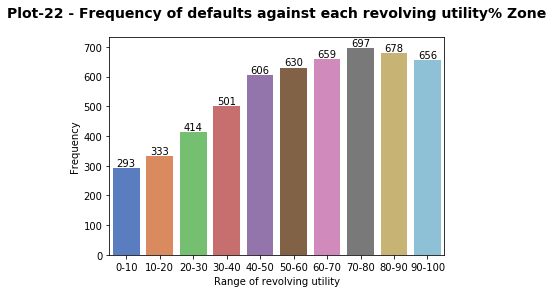

In [135]:
ax =sns.countplot(x='range1', data = chargedoff_loan,palette='muted')
Title='Plot-22 - Frequency of defaults against each revolving utility% Zone'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Range of revolving utility")
ax.set_ylabel("Frequency")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:d}".format(height), 
                            (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center', va='center', 
                            xytext=(0, 5), textcoords='offset points') 
               

### 3.3 Bivariate Analysis <br>

In [138]:
# Genric Functions for annotations.
def annotations(ax,textoffset,raxis):
    for p in ax.patches:
        height,width =p.get_height(),p.get_x()
        if (~np.isnan(height)):
            ax.annotate("{:.0f}".format(height), 
                       (p.get_x() + p.get_width() / 2.,
                        p.get_height()),
                        ha='center', va='center', rotation=raxis, 
                        xytext=(0, textoffset), textcoords='offset points') 

#### 3.3.1 - Plot-1 - Analaysis of Home Ownership and verified status for the defaulted Loans.

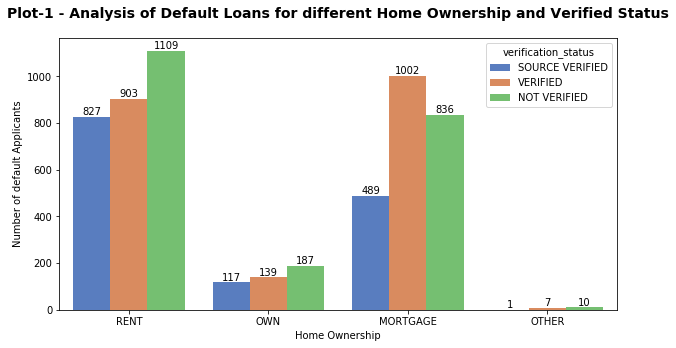

In [139]:
# Bivariate Analaysis Plot-1
# Analysis of Applicant Residence State Vs Count of Charged-Off Loans

f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="home_ownership",hue='verification_status',data = chargedoff_loan,palette='muted')
Title='Plot-1 - Analysis of Default Loans for different Home Ownership and Verified Status'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Home Ownership")
ax.set_ylabel("Number of default Applicants")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)       
plt.show();

#####  Observations
> - The Plot-1  shows ;
  - The majority defaulters in the in the RENT category.
  - In that, around `1109`  cases in which source was `not verified`  indicating the huge risk.

In [140]:
### Splitting the annual income of the applicants into specific income zone.
chargedoff_loan = chargedoff_loan.assign(range=pd.cut(loan_filtered['annual_inc'],\
                    [0,5000,15000,30000,60000,80000,120000,200000,500000,1250000],
                    labels=['Least income','Less Income','low_average','average','upper_average',\
                            'high','higher','upperhigher','highest'] ))

#### 3.3.2 - Plot-2 - Analysis of Annual Income Group against the Number of Default Loans

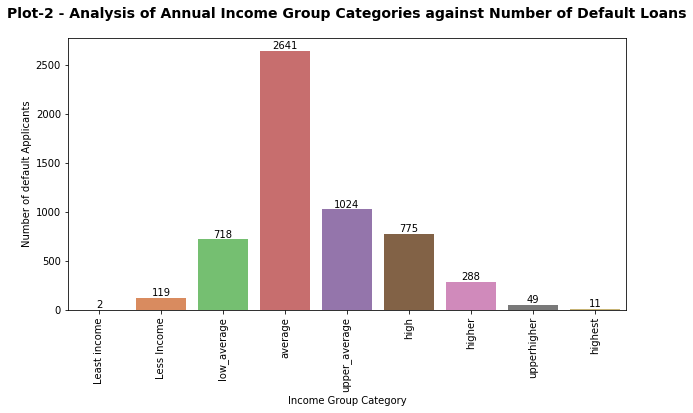

In [141]:
# Bivariate Analaysis Plot-2
# Analysis of Income Bin Against of Charged-Off Loans

f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="range",data = chargedoff_loan,palette='muted')
Title='Plot-2 - Analysis of Annual Income Group Categories against Number of Default Loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Group Category")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)

    #Annotations.
annotations(ax,5,0)
plt.show();

 #####  Observations
> - Maximum defaulters are in annual income range of 30000 - 60000.

#### 3.3.3 - Plot-3- Analysis of Annual Income Group for the term against Number of default Loans

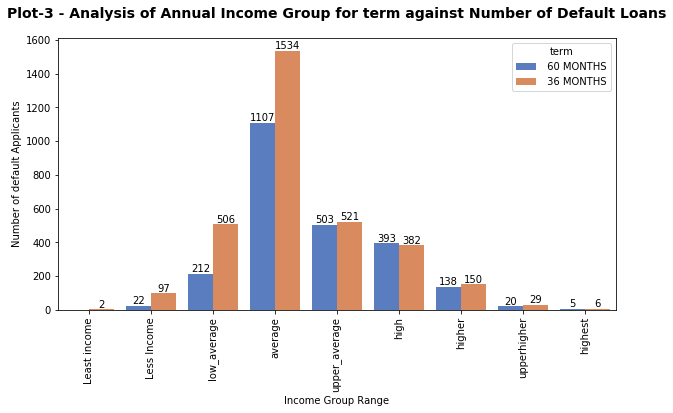

In [142]:
# Bivariate Analaysis Plot-3
# Analysis of Income Bin against term 

f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="range",hue='term',data = chargedoff_loan,palette='muted')
Title='Plot-3 - Analysis of Annual Income Group for term against Number of Default Loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Group Range")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)

plt.show();

#####  Observations
> - The plot-3 shows;
    - Maximum defaulters in the term of 36 and 60 months are in the annual income range of 30000 - 60000.

#### 3.3.4 - Plot-4- Analysis of Annual Income Group for the Verification Status against Number of default Loans

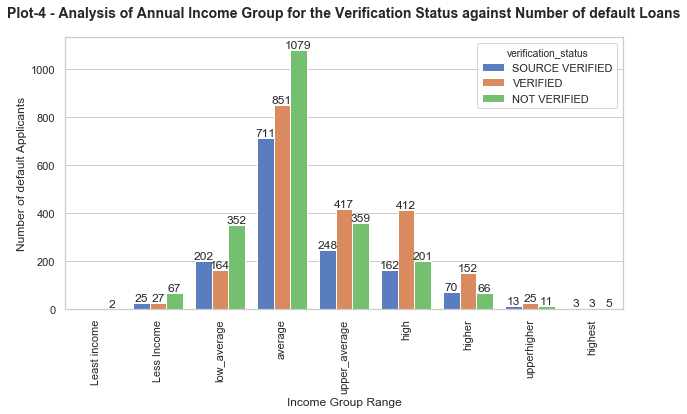

In [91]:
# Bivariate Analaysis Plot-4
# Analysis of Income Bin with verification status

f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="range",hue='verification_status',data = chargedoff_loan,palette='muted')
Title='Plot-4 - Analysis of Annual Income Group for the Verification Status against Number of default Loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Group Range")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)             
plt.show();

#####  Observations
> - The plot-4 shows;
    - Maximum defaulters are either not verified in the annual income range of 30000 - 60000.
    - This is a huge risk.

#####  Interest Category Column Creation
> With just int_rate value as such its not helpful..so we need to create a new column 'int_category' based on int_rate , have classified as 5-10 as 'Low', 10-18 as 'Medium'and more than 18 as 'High'

In [92]:
chargedoff_loan = chargedoff_loan.assign( 
    int_category = pd.cut(
        chargedoff_loan.int_rate,
        [-1, 10, 18, 25],
        labels=['Low', 'Medium', 'High']))

#### 3.3.5 - Plot- 5- Analysis of Interest Rate Bin Category versus Term loans for default loans.

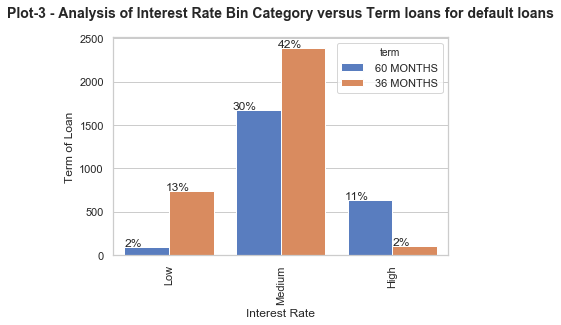

In [93]:
# Bivariate Analaysis Plot-3
# Analysis of Interest Rate Category Vs Term

ax =sns.countplot(x="int_category",hue='term',data = chargedoff_loan,palette='muted')
Title='Plot-3 - Analysis of Interest Rate Bin Category versus Term loans for default loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Interest Rate")
ax.set_ylabel("Term of Loan")

for item in ax.get_xticklabels():
    item.set_rotation(90)

#Annotations.
total = float(len(chargedoff_loan))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
               
plt.show();

 #####  Observations
> - Maximum defaulters are in Medium Interest rate i.e. between 10 to 18%.
> - Out of 72% , 42% have taken loan term as 36 Months and 30% as 60 Months

#### 3.3.6 - Plot- 6 - Analysis of Interest Rate bin category versus Employee experience for default loans.

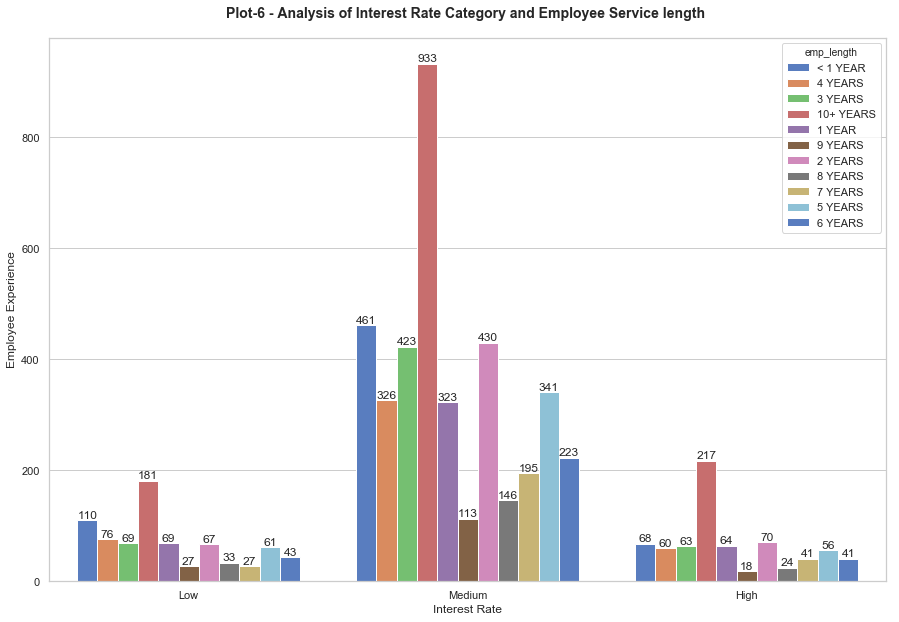

In [94]:
# Bivariate Analaysis Plot-4
# Analysis of Interest Rate Category Vs Employee Length
plt.figure(figsize=(15, 10))
ax =sns.countplot(x="int_category",hue='emp_length',data = chargedoff_loan,palette='muted')
Title='Plot-6 - Analysis of Interest Rate Category and Employee Service length '
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Interest Rate")
ax.set_ylabel("Employee Experience")

#Annotations.
annotations(ax,5,0)
              
plt.show(); 

 #####  Observations
> - The Plot-6 shows;
  - Employees having service more than 10+ years have taken the Most Medium Interest rate Loans

#### 3.3.7 - Plot- 7 - Bivariate Correlation Analysis.

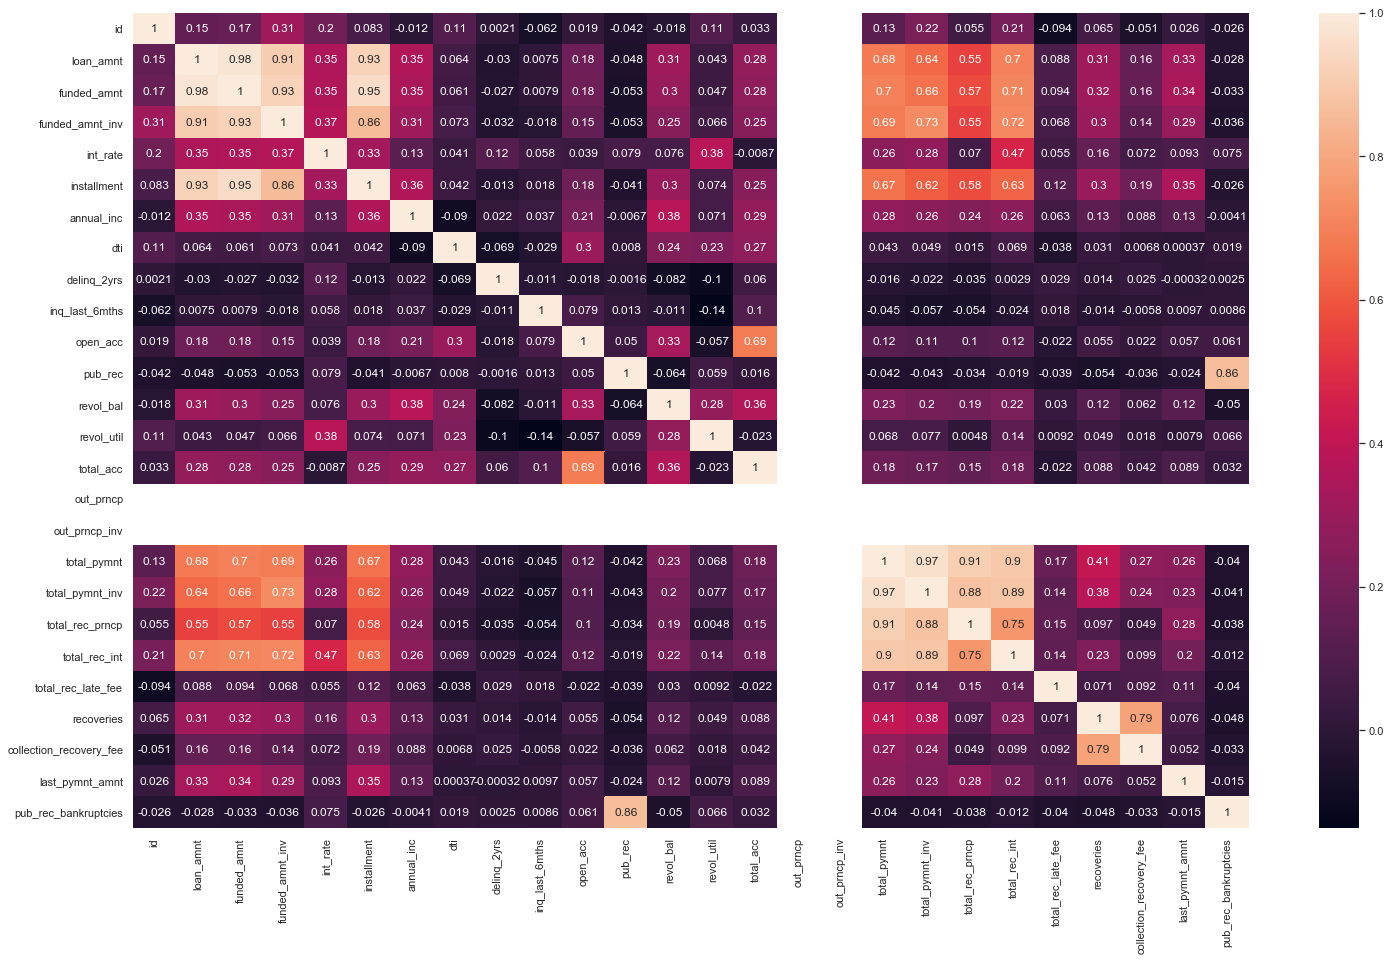

In [95]:
## Heat Map plot to figure out the best correlated vaiables that can be used for Bi-Variate Analysis
plt.figure(figsize=(25, 15))

chargedoff_loan_corr = chargedoff_loan.corr()
sns.heatmap(chargedoff_loan_corr, 
            xticklabels = chargedoff_loan_corr.columns.values,
            yticklabels = chargedoff_loan_corr.columns.values,
            annot = True);

#### From the heat map have picked the Topmost Correlated Variables

> - The following have high correlation from the heat map
    - Loan Amount , Funded Amount
    - Instalment, Funded Amount Invested
    - Total Payment, Total Payment Invested
    - pub_rec,pub_rec_bankruptcies

#### 3.3.8 - Plot-8 - Correlation Analysis - Loan Amount against Funded Amount for the purpose of the charged off Loans.

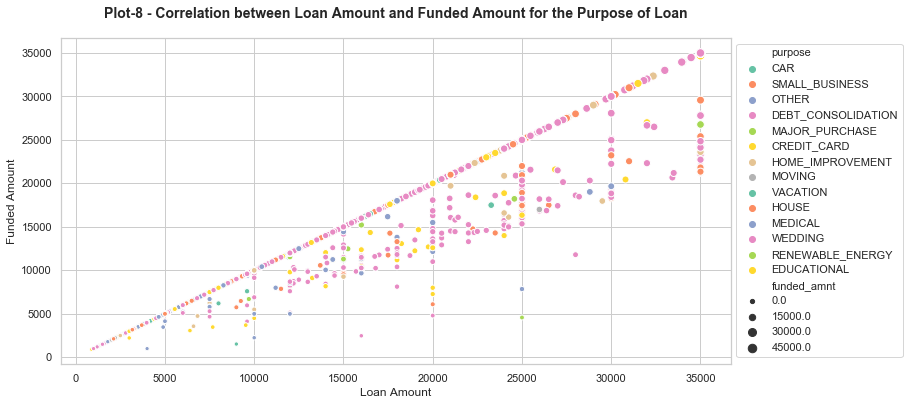

In [96]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x="loan_amnt", y="funded_amnt",hue='purpose',size='funded_amnt',palette='Set2',
                     linewidth=1,data=chargedoff_loan)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))

Title='Plot-8 - Correlation between Loan Amount and Funded Amount for the Purpose of Loan'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Funded Amount")

plt.show();

 #####  Observations
> - The Plot-1  shows ;
  - Positive correlation  between loan_amnt and funded amount and it is linear.
  - It clearly shows that with Increase in Loan Amount the funded amount increases
  - Maximum funded Amount is for Debt Consolidation indicated by circle marked larger and Pink color.

#### 3.3.9 - Plot-9 - Correlation Analysis - Funded Amount Invested against Installments for a Purpose of Loan

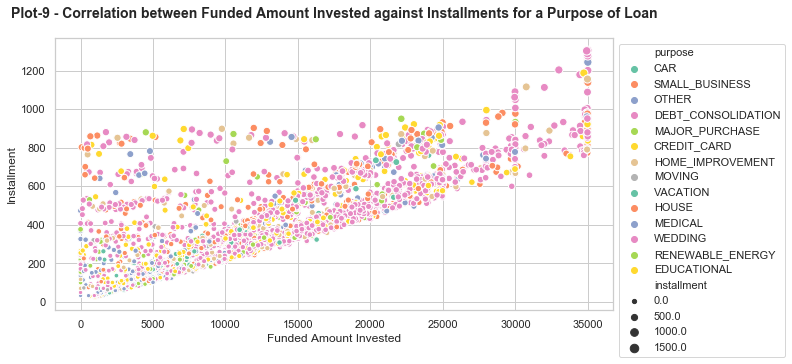

In [97]:
plt.figure(figsize=(10,5))
#sns.scatterplot(x="funded_amnt_inv", y="installment", data=chargedoff_loan)
ax = sns.scatterplot(x="funded_amnt_inv", y="installment",hue='purpose',size='installment',palette='Set2',
                     linewidth=1,data=chargedoff_loan)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))

Title='Plot-9 - Correlation between Funded Amount Invested against Installments for a Purpose of Loan'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel('Funded Amount Invested')
ax.set_ylabel('Installment')

plt.show();

 #####  Observations
> - The Plot-9  shows ;
  - A positive correlation  between funded amount and installment  
  - It clearly shows that with Increase in the Funded amount invested the installment increase
  - The correlation between funded_amnt_inv and installment is `0.86'
  - Higher installmens for debt consolidation and credit card repay purposes.

#### 3.3.10 - Plot-10 - Correlation Analysis - Total loan payment against total loan payment invested for a purpose for a Purpose of Loan

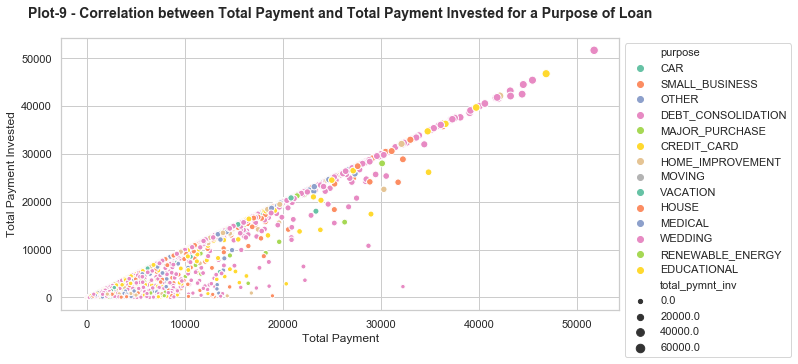

In [98]:
plt.figure(figsize=(10,5))
#sns.scatterplot(x="total_pymnt", y="total_pymnt_inv", data=chargedoff_loan
ax = sns.scatterplot(x="total_pymnt", y="total_pymnt_inv",hue='purpose',size='total_pymnt_inv',
                     palette='Set2',
                     linewidth=1,
                     data=chargedoff_loan)

ax.get_legend().set_bbox_to_anchor((1.0, 1.0))

Title='Plot-9 - Correlation between Total Payment and Total Payment Invested for a Purpose of Loan'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel('Total Payment')
ax.set_ylabel('Total Payment Invested')
plt.show();

 #####  Observations
> - The Plot-9  shows ;
  - A positive correlation  between Total Payment and Total Payment Investment  
  - It shows that the Payments are been regularly received from the Investors for the total amount funded
  - Again highest payment invested for the Debt Consolidation and credit cards

In [225]:
chargedoff_loan = chargedoff_loan.assign(range=pd.cut(loan_filtered['annual_inc'],[0,5000,15000,30000,60000,80000,120000,200000,500000,1250000],
                    labels=['Least income','Less Income','low_average','average','upper_average','high','higher','upperhigher','highest'] ))





<Figure size 1152x576 with 0 Axes>

Text(0.5,1,'Analysis of Annual Income vs Number of defaults')

Text(0.5,0,'Income Range')

Text(0,0.5,'Number of defaults')

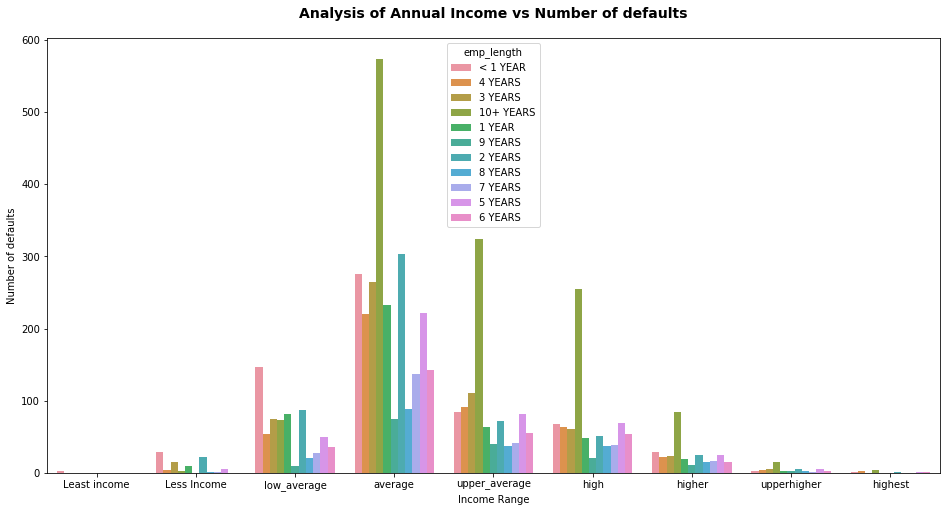

In [235]:


plt.figure(figsize=(16,8))

ax = sns.countplot(x="range",hue = "emp_length",data = chargedoff_loan)
Title='Analysis of Annual Income vs Number of defaults'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Range")
ax.set_ylabel("Number of defaults")

plt.show()

In [216]:
loan_10year = chargedoff_loan[chargedoff_loan.emp_length == 10]

In [236]:
loan_10year.to_csv("c:/users/134466/desktop/EDA-Assignment/loan_10year.csv")

<Figure size 1152x576 with 0 Axes>

Text(0.5,1,'Analysis of Annual Income and salary range vs default count for employees >= 10 years experience')

Text(0.5,0,'Income Range')

Text(0,0.5,'Number of defaults')

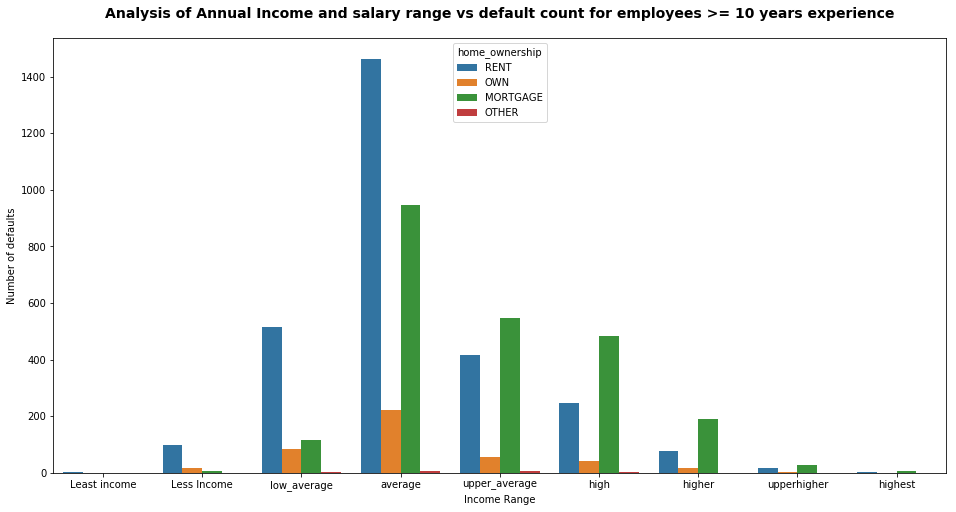

In [233]:
plt.figure(figsize=(16,8))

ax = sns.countplot(x = "range" , hue = "home_ownership" , data = loan_10year)
Title='Analysis of Annual Income and salary range vs default count for employees >= 10 years experience'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Range")
ax.set_ylabel("Number of defaults")

In [239]:
loan_10year = loan_10year [loan_10year.home_ownership != 'OWN']
loan_10year = loan_10year [loan_10year.range == 'average']

In [240]:
loan_10year.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,range1,range
26,1069800,"15,000.00","15,000.00","8,725.00",36 MONTHS,14.27,514.64,C,C2,NYC TRANSIT,10,RENT,"60,000.00",NOT VERIFIED,2011-12-01,CHARGED OFF,DEBT_CONSOLIDATION,103XX,NY,15.22,0,2003-10-01,1,7,0,5872,57.60,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,0.00,2016-05-01,0.00,50-60,average
27,1069657,"5,000.00","5,000.00","5,000.00",60 MONTHS,16.77,123.65,D,D2,FRITO LAY,10,RENT,"50,004.00",NOT VERIFIED,2011-12-01,CHARGED OFF,OTHER,150XX,PA,13.97,3,2003-10-01,0,14,0,4345,59.50,22,0.00,0.00,"1,609.12","1,609.12",629.05,719.11,0.00,260.96,2.30,2012-12-01,123.65,2013-05-01,0.00,50-60,average
53,1069243,"12,000.00","12,000.00","12,000.00",36 MONTHS,15.96,421.65,C,C5,CHEMAT TECHNOLOGY INC,10,RENT,"50,000.00",NOT VERIFIED,2011-12-01,CHARGED OFF,CAR,914XX,CA,20.88,0,2006-10-01,2,11,0,15793,90.80,11,0.00,0.00,"3,521.95","3,521.95","1,903.66","1,039.35",0.00,578.94,5.49,2012-08-01,421.65,2012-12-01,0.00,90-100,average
55,1069410,"21,000.00","21,000.00","20,975.00",60 MONTHS,19.91,555.33,E,E4,COSTCO,10,RENT,"50,000.00",VERIFIED,2011-12-01,CHARGED OFF,DEBT_CONSOLIDATION,980XX,WA,21.58,0,1998-09-01,1,7,0,19448,97.60,14,0.00,0.00,"18,319.14","18,297.35","8,990.81","9,328.33",0.00,0.00,0.00,2014-10-01,555.33,2016-05-01,0.00,90-100,average
64,1069126,"10,000.00","10,000.00","9,975.00",60 MONTHS,10.65,215.69,B,B2,CEC ENTERTAINMENT INC,10,RENT,"45,996.00",VERIFIED,2011-12-01,CHARGED OFF,DEBT_CONSOLIDATION,440XX,OH,21.73,0,1997-05-01,1,7,0,11170,30.10,15,0.00,0.00,"8,772.91","8,751.08","5,495.38","2,429.23",1.00,847.30,152.51,2015-04-01,1.00,2015-06-01,0.00,30-40,average
97,1068542,"17,500.00","17,500.00","17,500.00",60 MONTHS,17.27,437.47,D,D3,TRAVELERS INSURANCE,10,MORTGAGE,"45,000.00",NOT VERIFIED,2011-12-01,CHARGED OFF,CREDIT_CARD,992XX,WA,21.31,0,2002-09-01,2,13,0,20129,86.10,26,0.00,0.00,"10,037.10","10,037.10","3,077.85","3,473.25",0.00,"3,486.00",625.62,2013-04-01,437.47,2015-12-01,0.00,80-90,average
105,1068309,"18,825.00","18,825.00","18,800.00",60 MONTHS,16.77,465.53,D,D2,TEXAS HEALTH & HUMAN SERVICES COMMISSION,10,RENT,"38,000.00",VERIFIED,2011-12-01,CHARGED OFF,DEBT_CONSOLIDATION,787XX,TX,23.18,0,2004-12-01,0,6,0,11004,79.70,7,0.00,0.00,"18,749.25","18,724.53","8,087.75","6,786.71",0.00,"3,874.79",670.82,2014-09-01,465.53,2016-05-01,0.00,70-80,average
121,1068006,"19,750.00","19,750.00","19,725.00",36 MONTHS,10.65,643.33,B,B2,"PACIFIC WOOD LAMINATES, INC.",10,RENT,"45,000.00",VERIFIED,2011-12-01,CHARGED OFF,DEBT_CONSOLIDATION,974XX,OR,22.80,0,2000-09-01,0,12,0,16576,54.20,28,0.00,0.00,"11,930.65","11,915.62","8,590.58","2,698.78",0.00,641.29,6.41,2013-09-01,787.01,2013-11-01,0.00,50-60,average
124,1068179,"28,000.00","11,800.00","11,775.00",60 MONTHS,19.91,312.04,E,E4,AMERICAN AIRLINES,10,RENT,"52,000.00",VERIFIED,2011-12-01,CHARGED OFF,DEBT_CONSOLIDATION,752XX,TX,20.70,0,1988-12-01,0,10,0,29178,87.60,16,0.00,0.00,"12,173.07","12,147.29","4,281.54","4,759.37",0.00,"3,132.16",563.79,2014-06-01,312.04,2014-09-01,0.00,80-90,average
137,1068111,"11,100.00","11,100.00","11,100.00",36 MONTHS,6.62,340.82,A,A2,AETNA,10,RENT,"41,000.00",VERIFIED,2011-12-01,CHARGED OFF,CREDIT_CARD,194XX,PA,29.85,0,1991-01-01,1,8,0,17518,62.30,18,0.00,0.00,"8,120.14","8,120.14","6,516.79",976.85,0.00,626.50,6.27,2013-11-01,340.82,2014-03-01,0.00,60-70,average


<Figure size 1440x576 with 0 Axes>

Text(0.5,1,'Analysis of purpose of loan vs Number of defaults(10+ years of experience in average salary range)')

Text(0.5,17.2,'Purpose of loan')

Text(17.2,0.5,'Number of defaults')

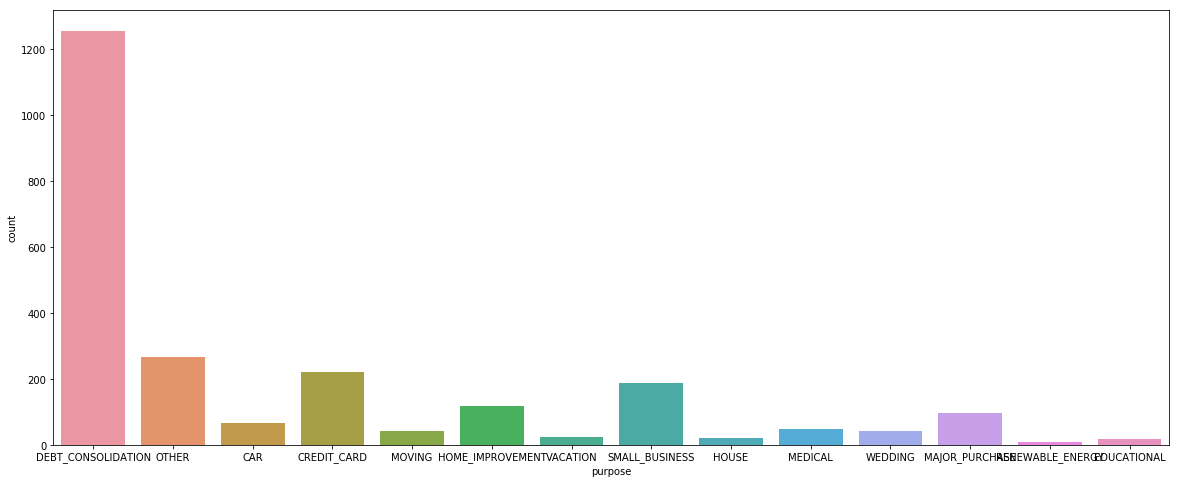

In [255]:
plt.figure(figsize=(20,8))
Title='Analysis of purpose of loan vs Number of defaults(10+ years of experience in average salary range)'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Purpose of loan")
ax.set_ylabel("Number of defaults")
sns.countplot (x ="purpose", data = loan_10year)
plt.show()
